In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb
import lightgbm as lgb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/sample_submission.csv
/kaggle/input/train.csv
/kaggle/input/test.csv


#  Load Data Set

In [514]:
df = pd.read_csv("/kaggle/input/mlx-2-0/train.csv")

In [515]:
df_test = pd.read_csv("/kaggle/input/mlx-2-0/test.csv")

In [516]:
df.head()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
0,76339,0.482850,1.169231,80.018,0.0201,Country Stuff (feat. Jake Owen),1.0,0.789,154586.0,NaN,...,4.0,161853.0,7.0,4.0,NaN,0.607,7.0,0.7250,0.000000,74
1,80006,0.267862,1.321321,147.966,0.3340,Solitude,6.0,0.715,46874.0,15.0,...,4.0,155619.0,1.0,4.0,0.843,0.783,4.0,NaN,0.043200,2
2,83501,0.242606,1.285319,142.980,0.1110,BDFFRNT (Saved from Conformity),4.0,NaN,264665.0,7.0,...,4.0,209378.0,6.0,4.0,NaN,0.211,10.0,0.6020,0.000000,35
3,81530,0.426400,1.279435,123.063,0.1960,Headlights (feat. Ilsey),5.0,0.685,209208.0,5.0,...,4.0,219043.0,11.0,4.0,0.702,0.369,NaN,0.8200,0.000335,70
4,60534,0.000000,0.974906,132.722,0.0811,Afraid,6.0,0.856,215346.0,5.0,...,4.0,258893.0,1.0,0.0,0.000,0.631,1.0,0.0221,0.000000,78


In [517]:
df.head()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
0,76339,0.482850,1.169231,80.018,0.0201,Country Stuff (feat. Jake Owen),1.0,0.789,154586.0,NaN,...,4.0,161853.0,7.0,4.0,NaN,0.607,7.0,0.7250,0.000000,74
1,80006,0.267862,1.321321,147.966,0.3340,Solitude,6.0,0.715,46874.0,15.0,...,4.0,155619.0,1.0,4.0,0.843,0.783,4.0,NaN,0.043200,2
2,83501,0.242606,1.285319,142.980,0.1110,BDFFRNT (Saved from Conformity),4.0,NaN,264665.0,7.0,...,4.0,209378.0,6.0,4.0,NaN,0.211,10.0,0.6020,0.000000,35
3,81530,0.426400,1.279435,123.063,0.1960,Headlights (feat. Ilsey),5.0,0.685,209208.0,5.0,...,4.0,219043.0,11.0,4.0,0.702,0.369,NaN,0.8200,0.000335,70
4,60534,0.000000,0.974906,132.722,0.0811,Afraid,6.0,0.856,215346.0,5.0,...,4.0,258893.0,1.0,0.0,0.000,0.631,1.0,0.0221,0.000000,78


In [518]:
df_test.head()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,emotional_resonance_2,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0
0,25174,0.600480,1.543590,124.008,0.0729,Dr.Q,1.0,0.763,23032.0,4.0,...,0.834,4.0,253987.0,4.0,4.0,0.604,0.2050,0.0,0.720,0.165000
1,38453,NaN,0.722420,129.942,0.0105,Start A Party,11.0,0.801,215466.0,20.0,...,0.216,4.0,267626.0,5.0,4.0,0.881,0.2610,1.0,0.496,0.000000
2,29013,0.461916,0.757962,83.000,0.2700,Sombras - Live,2.0,0.561,252261.0,44.0,...,0.546,4.0,226626.0,0.0,4.0,0.555,0.0555,0.0,0.846,0.002760
3,57463,0.144236,0.923977,183.991,0.1210,Tennis Court,2.0,NaN,198907.0,23.0,...,0.337,4.0,234286.0,0.0,4.0,0.674,0.4040,7.0,0.428,0.000194
4,51264,0.629832,1.473795,201.277,0.0610,La Cumbia Del Lazo,10.0,0.716,158720.0,NaN,...,0.966,4.0,188520.0,8.0,4.0,0.511,0.9620,10.0,0.652,0.000115


# Exploratory Data Analysis

In [519]:
df.shape

(61609, 62)

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61609 entries, 0 to 61608
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          61609 non-null  int64  
 1   emotional_charge_2          59167 non-null  float64
 2   groove_efficiency_1         61429 non-null  float64
 3   beat_frequency_1            61223 non-null  float64
 4   organic_texture_2           61226 non-null  float64
 5   composition_label_0         58660 non-null  object 
 6   harmonic_scale_1            58304 non-null  float64
 7   intensity_index_0           55638 non-null  float64
 8   duration_ms_0               60320 non-null  float64
 9   album_name_length           52015 non-null  float64
 10  beat_frequency_0            51878 non-null  float64
 11  beat_frequency_2            59843 non-null  float64
 12  artist_count                58348 non-null  float64
 13  composition_label_1         601

In [521]:
df.describe()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,beat_frequency_0,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
count,61609.000000,59167.000000,61429.000000,61223.000000,61226.000000,58304.000000,55638.000000,6.032000e+04,52015.000000,51878.000000,...,59704.000000,5.250400e+04,53925.000000,58455.000000,56049.000000,60063.000000,57142.000000,60916.000000,60900.000000,61609.000000
mean,51390.780162,0.316976,1.238856,121.022910,0.274748,5.192594,0.604426,2.011315e+05,18.225723,119.133973,...,3.874849,2.110477e+05,5.212499,3.901274,0.612252,0.458851,5.288894,0.616045,0.148391,52.067328
std,29659.344472,0.212777,6.171617,30.467061,0.303020,3.629153,0.243943,1.100738e+05,14.404713,32.067971,...,0.564558,8.911099e+04,3.571288,0.465295,0.179591,0.261196,3.567118,0.230109,0.306915,21.569248
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.485000e+03,1.000000,0.000000,...,0.000000,4.120000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25832.000000,0.143877,0.730914,96.138000,0.027125,2.000000,0.447000,1.482340e+05,9.000000,94.802250,...,4.000000,1.682000e+05,2.000000,4.000000,0.506000,0.243000,2.000000,0.477000,0.000000,37.000000
50%,51410.000000,0.291060,1.004894,120.012000,0.141000,5.000000,0.633000,1.959215e+05,14.000000,119.893000,...,4.000000,2.029730e+05,5.000000,4.000000,0.630000,0.449000,5.000000,0.646000,0.000019,57.000000
75%,77069.000000,0.466860,1.358251,141.401000,0.454000,8.000000,0.803000,2.402488e+05,23.000000,140.023000,...,4.000000,2.413605e+05,8.000000,4.000000,0.745000,0.663000,8.000000,0.791000,0.024600,69.000000
max,102681.000000,0.976063,654.000000,239.983000,0.996000,11.000000,1.000000,3.664274e+06,199.000000,235.998000,...,5.000000,3.550973e+06,11.000000,5.000000,0.979000,1.000000,11.000000,1.000000,1.000000,100.000000


In [522]:
df.isnull().sum()

id                           0
emotional_charge_2        2442
groove_efficiency_1        180
beat_frequency_1           386
organic_texture_2          383
                          ... 
emotional_resonance_0     1546
harmonic_scale_2          4467
intensity_index_2          693
instrumental_density_0     709
target                       0
Length: 62, dtype: int64

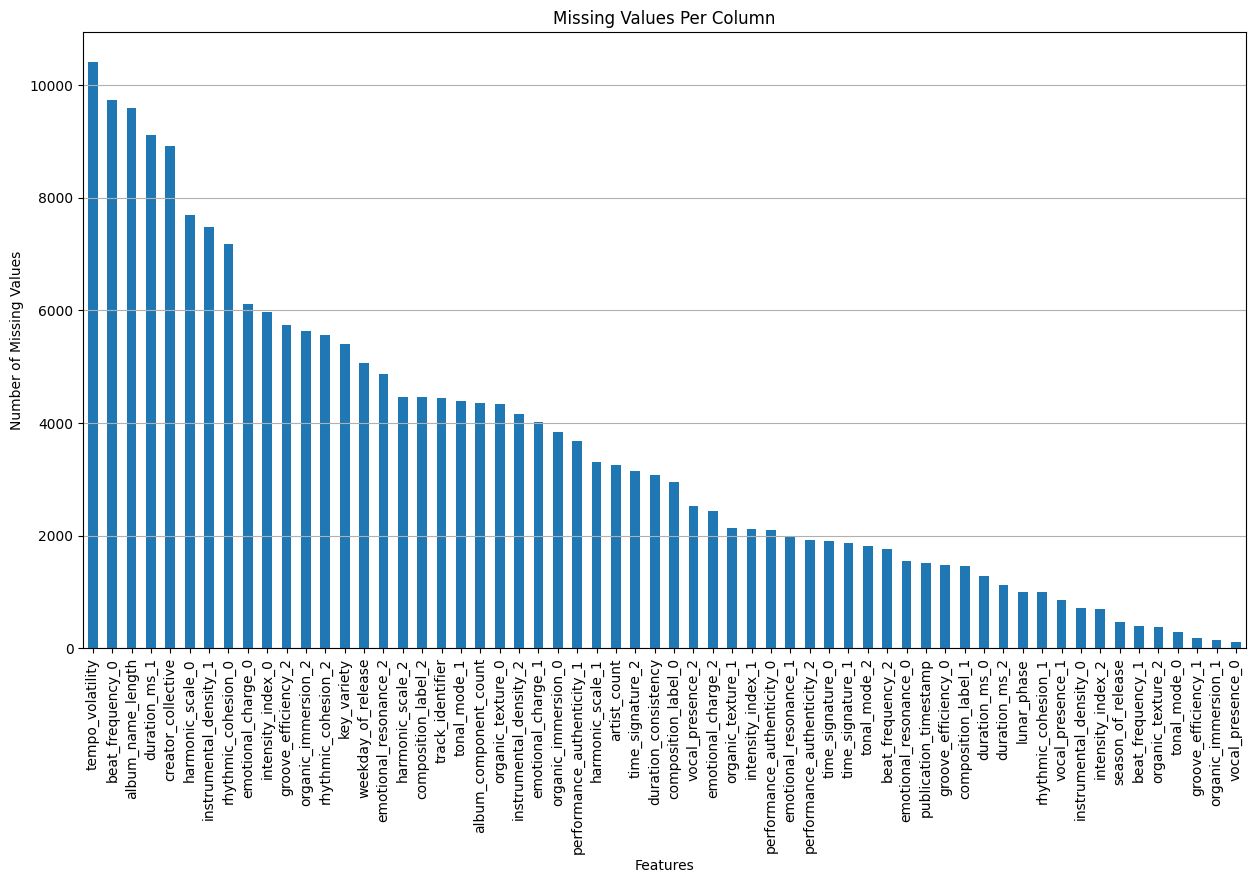

In [523]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only keep columns with missing values

# Sort missing values in descending order for better visualization
missing_values = missing_values.sort_values(ascending=False)

# Plot
plt.figure(figsize=(15, 8))
missing_values.plot(kind='bar')
plt.title('Missing Values Per Column')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


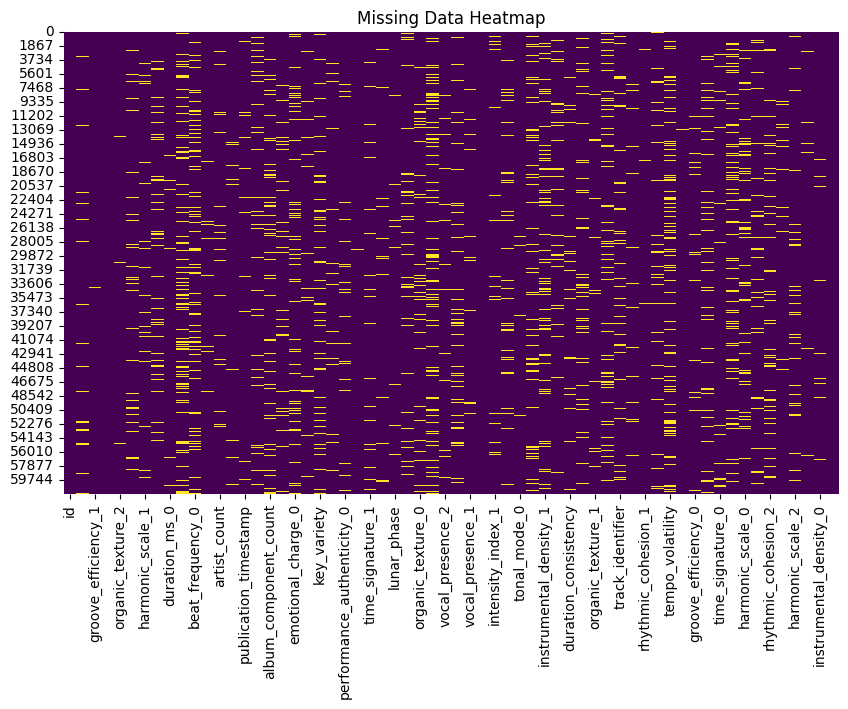

In [524]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull() , cmap= 'viridis',cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# Handling Missing Value

In [525]:
numerical_cols = list(df.select_dtypes(include=["float64", "int64"]).columns)

In [526]:
categorical_cols = list(df.select_dtypes(include=["object"]).columns)

In [527]:
numerical_cols.remove("target")

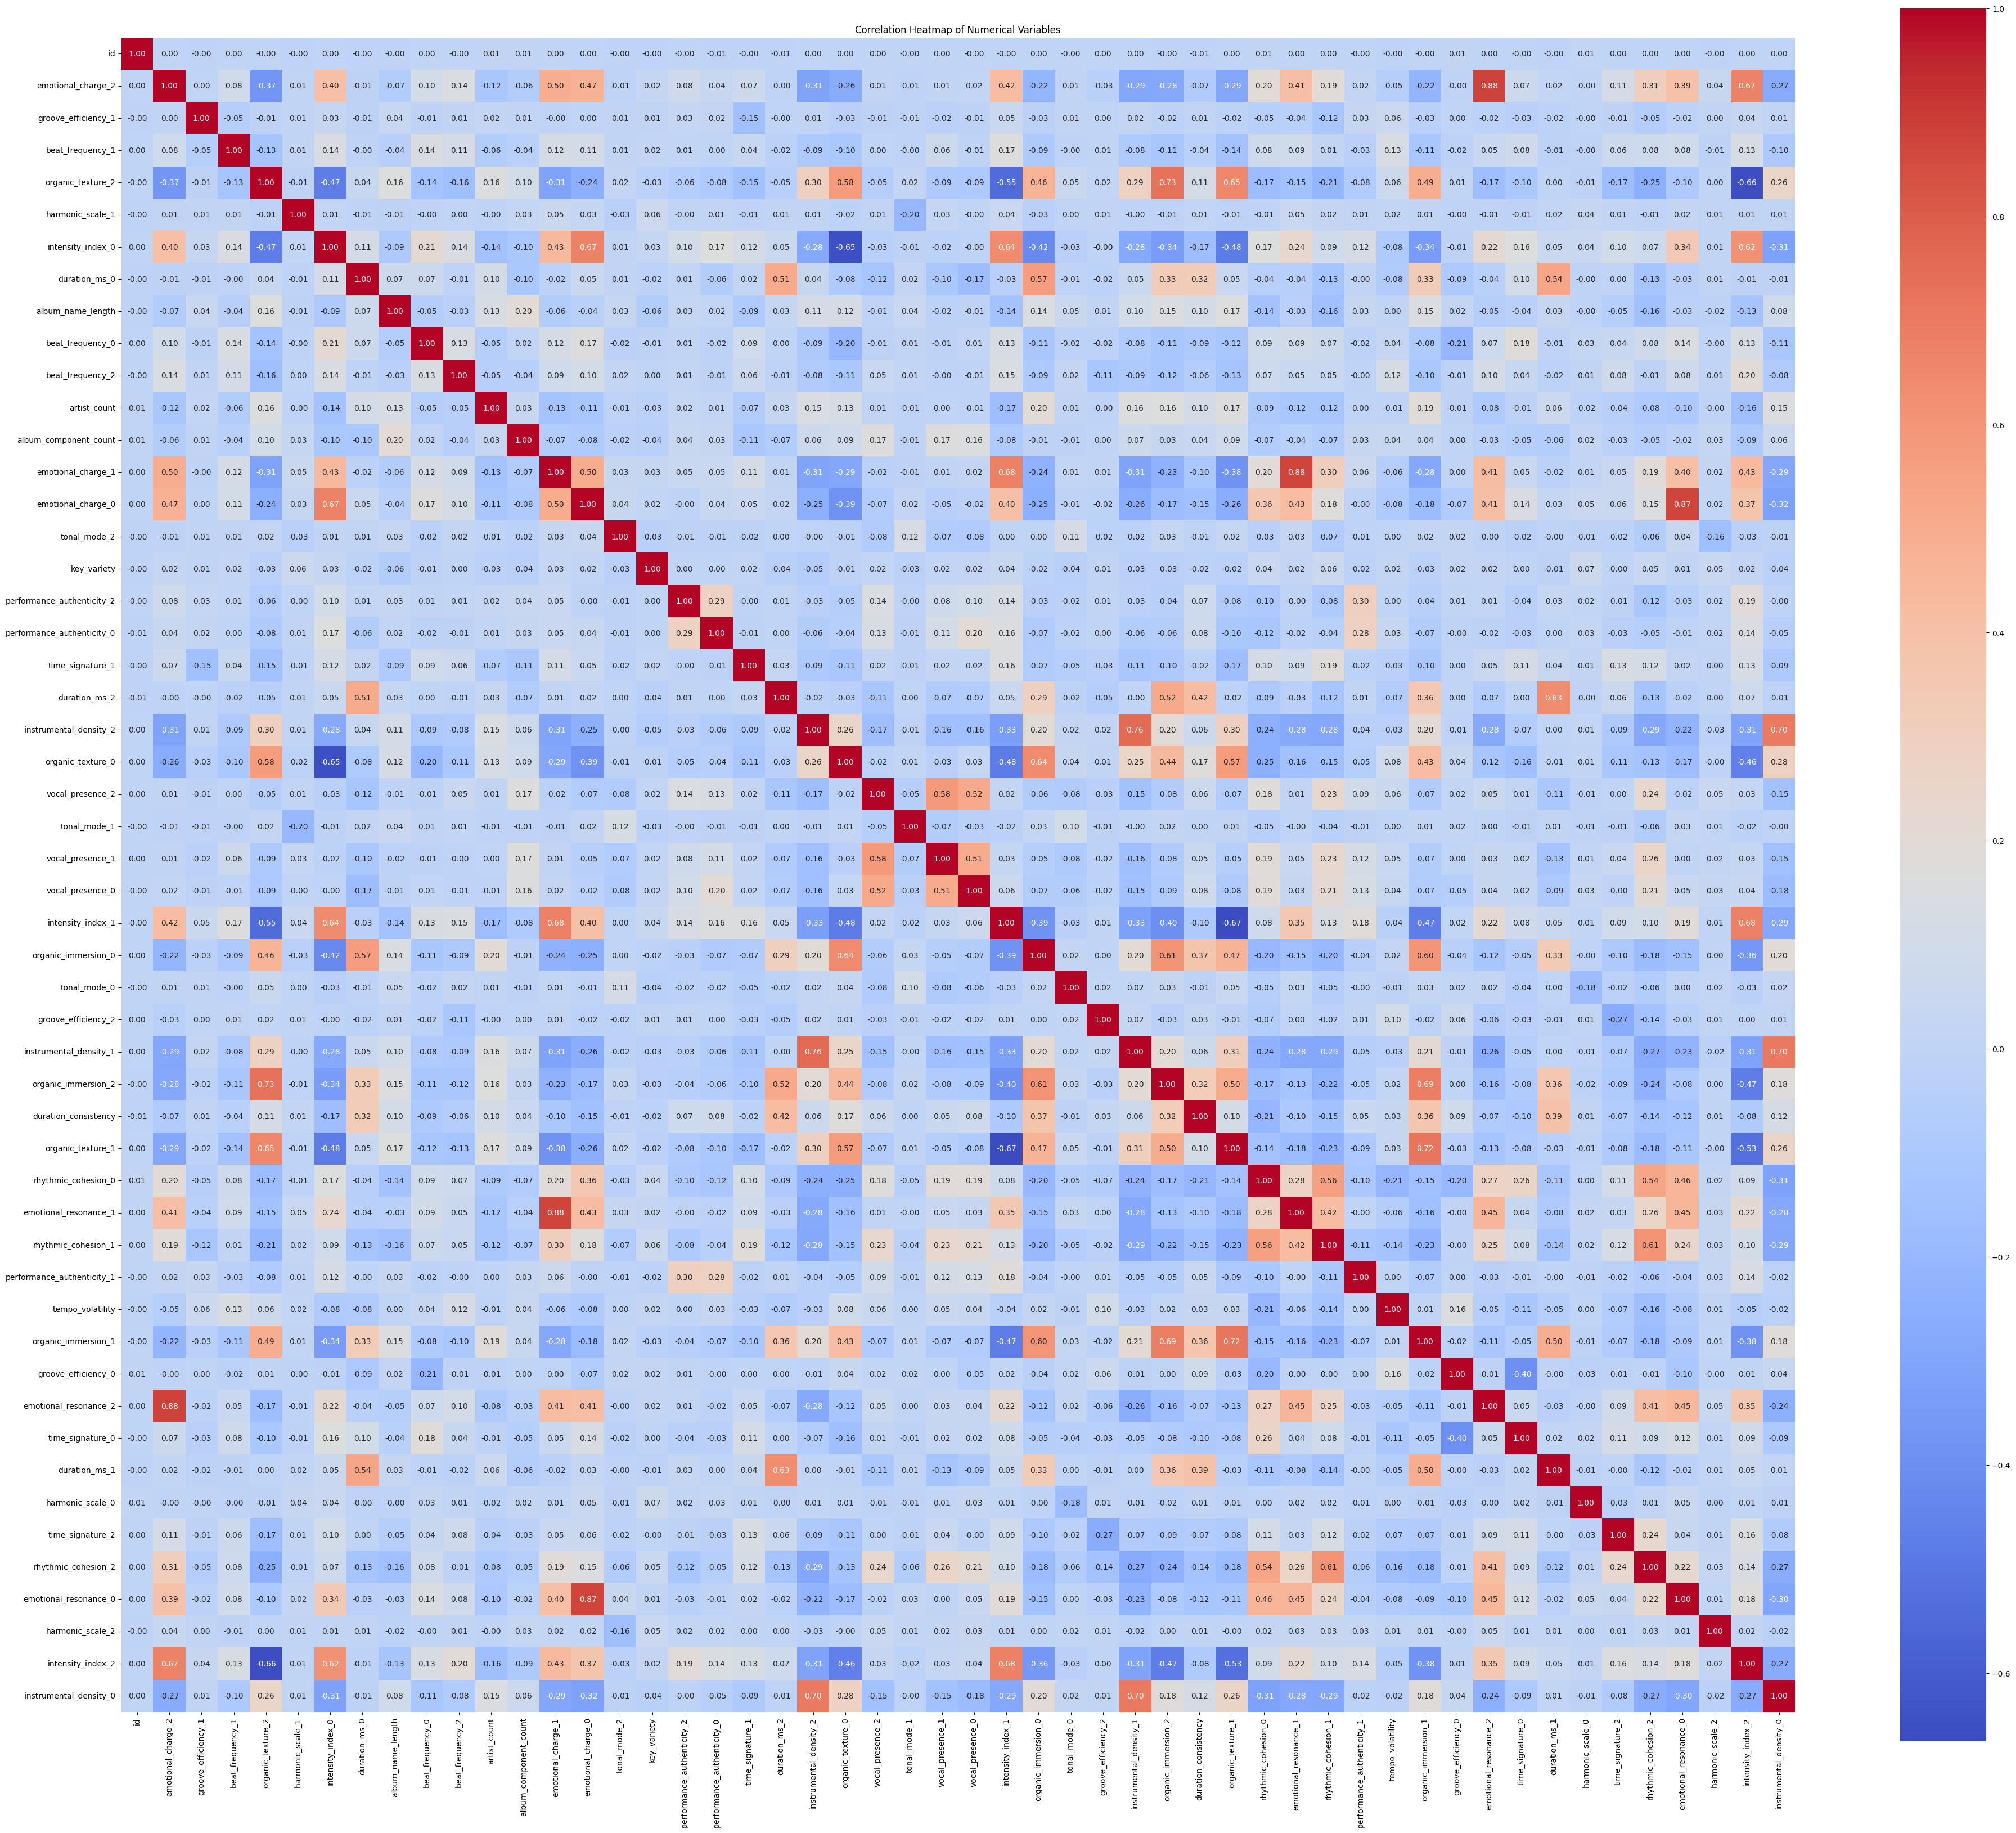

In [528]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[numerical_cols].corr()

plt.figure(figsize=(48, 40))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

In [529]:
# # Identify columns with missing values
# missing_cols = df_num.columns[df_num.isnull().any()]

# for col in missing_cols:
#     print(f"\nTop similar columns to '{col}' based on correlation:")
#     print(corr[col].drop(col).sort_values(ascending=False).head(3))


In [530]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [531]:
df_test[numerical_cols] = df_test[numerical_cols].fillna(df[numerical_cols].mean())
df_test[categorical_cols] = df_test[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [532]:
df.isnull().sum()

id                        0
emotional_charge_2        0
groove_efficiency_1       0
beat_frequency_1          0
organic_texture_2         0
                         ..
emotional_resonance_0     0
harmonic_scale_2          0
intensity_index_2         0
instrumental_density_0    0
target                    0
Length: 62, dtype: int64

# Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Feature Engineering

In [533]:
df_eng = df.copy()
df_test_eng = df_test.copy()

create df_eng data frame to do feature Engineering

## Emotional coherence across dimensions

In [534]:
if 'publication_timestamp' in df_eng.columns:
    df_eng['publication_timestamp'] = pd.to_datetime(df_eng['publication_timestamp'], errors='coerce')
    df_eng['year'] = df_eng['publication_timestamp'].dt.year
    df_eng['month'] = df_eng['publication_timestamp'].dt.month
    df_eng['day_of_year'] = df_eng['publication_timestamp'].dt.dayofyear

In [535]:
if 'publication_timestamp' in df_eng.columns:
    df_test_eng['publication_timestamp'] = pd.to_datetime(df_test_eng['publication_timestamp'], errors='coerce')
    df_test_eng['year'] = df_test_eng['publication_timestamp'].dt.year
    df_test_eng['month'] = df_test_eng['publication_timestamp'].dt.month
    df_test_eng['day_of_year'] = df_test_eng['publication_timestamp'].dt.dayofyear

In [536]:
emotional_cols = [col for col in df_eng.columns if 'emotional' in col.lower()]

In [537]:
emotional_cols

['emotional_charge_2',
 'emotional_charge_1',
 'emotional_charge_0',
 'emotional_resonance_1',
 'emotional_resonance_2',
 'emotional_resonance_0']

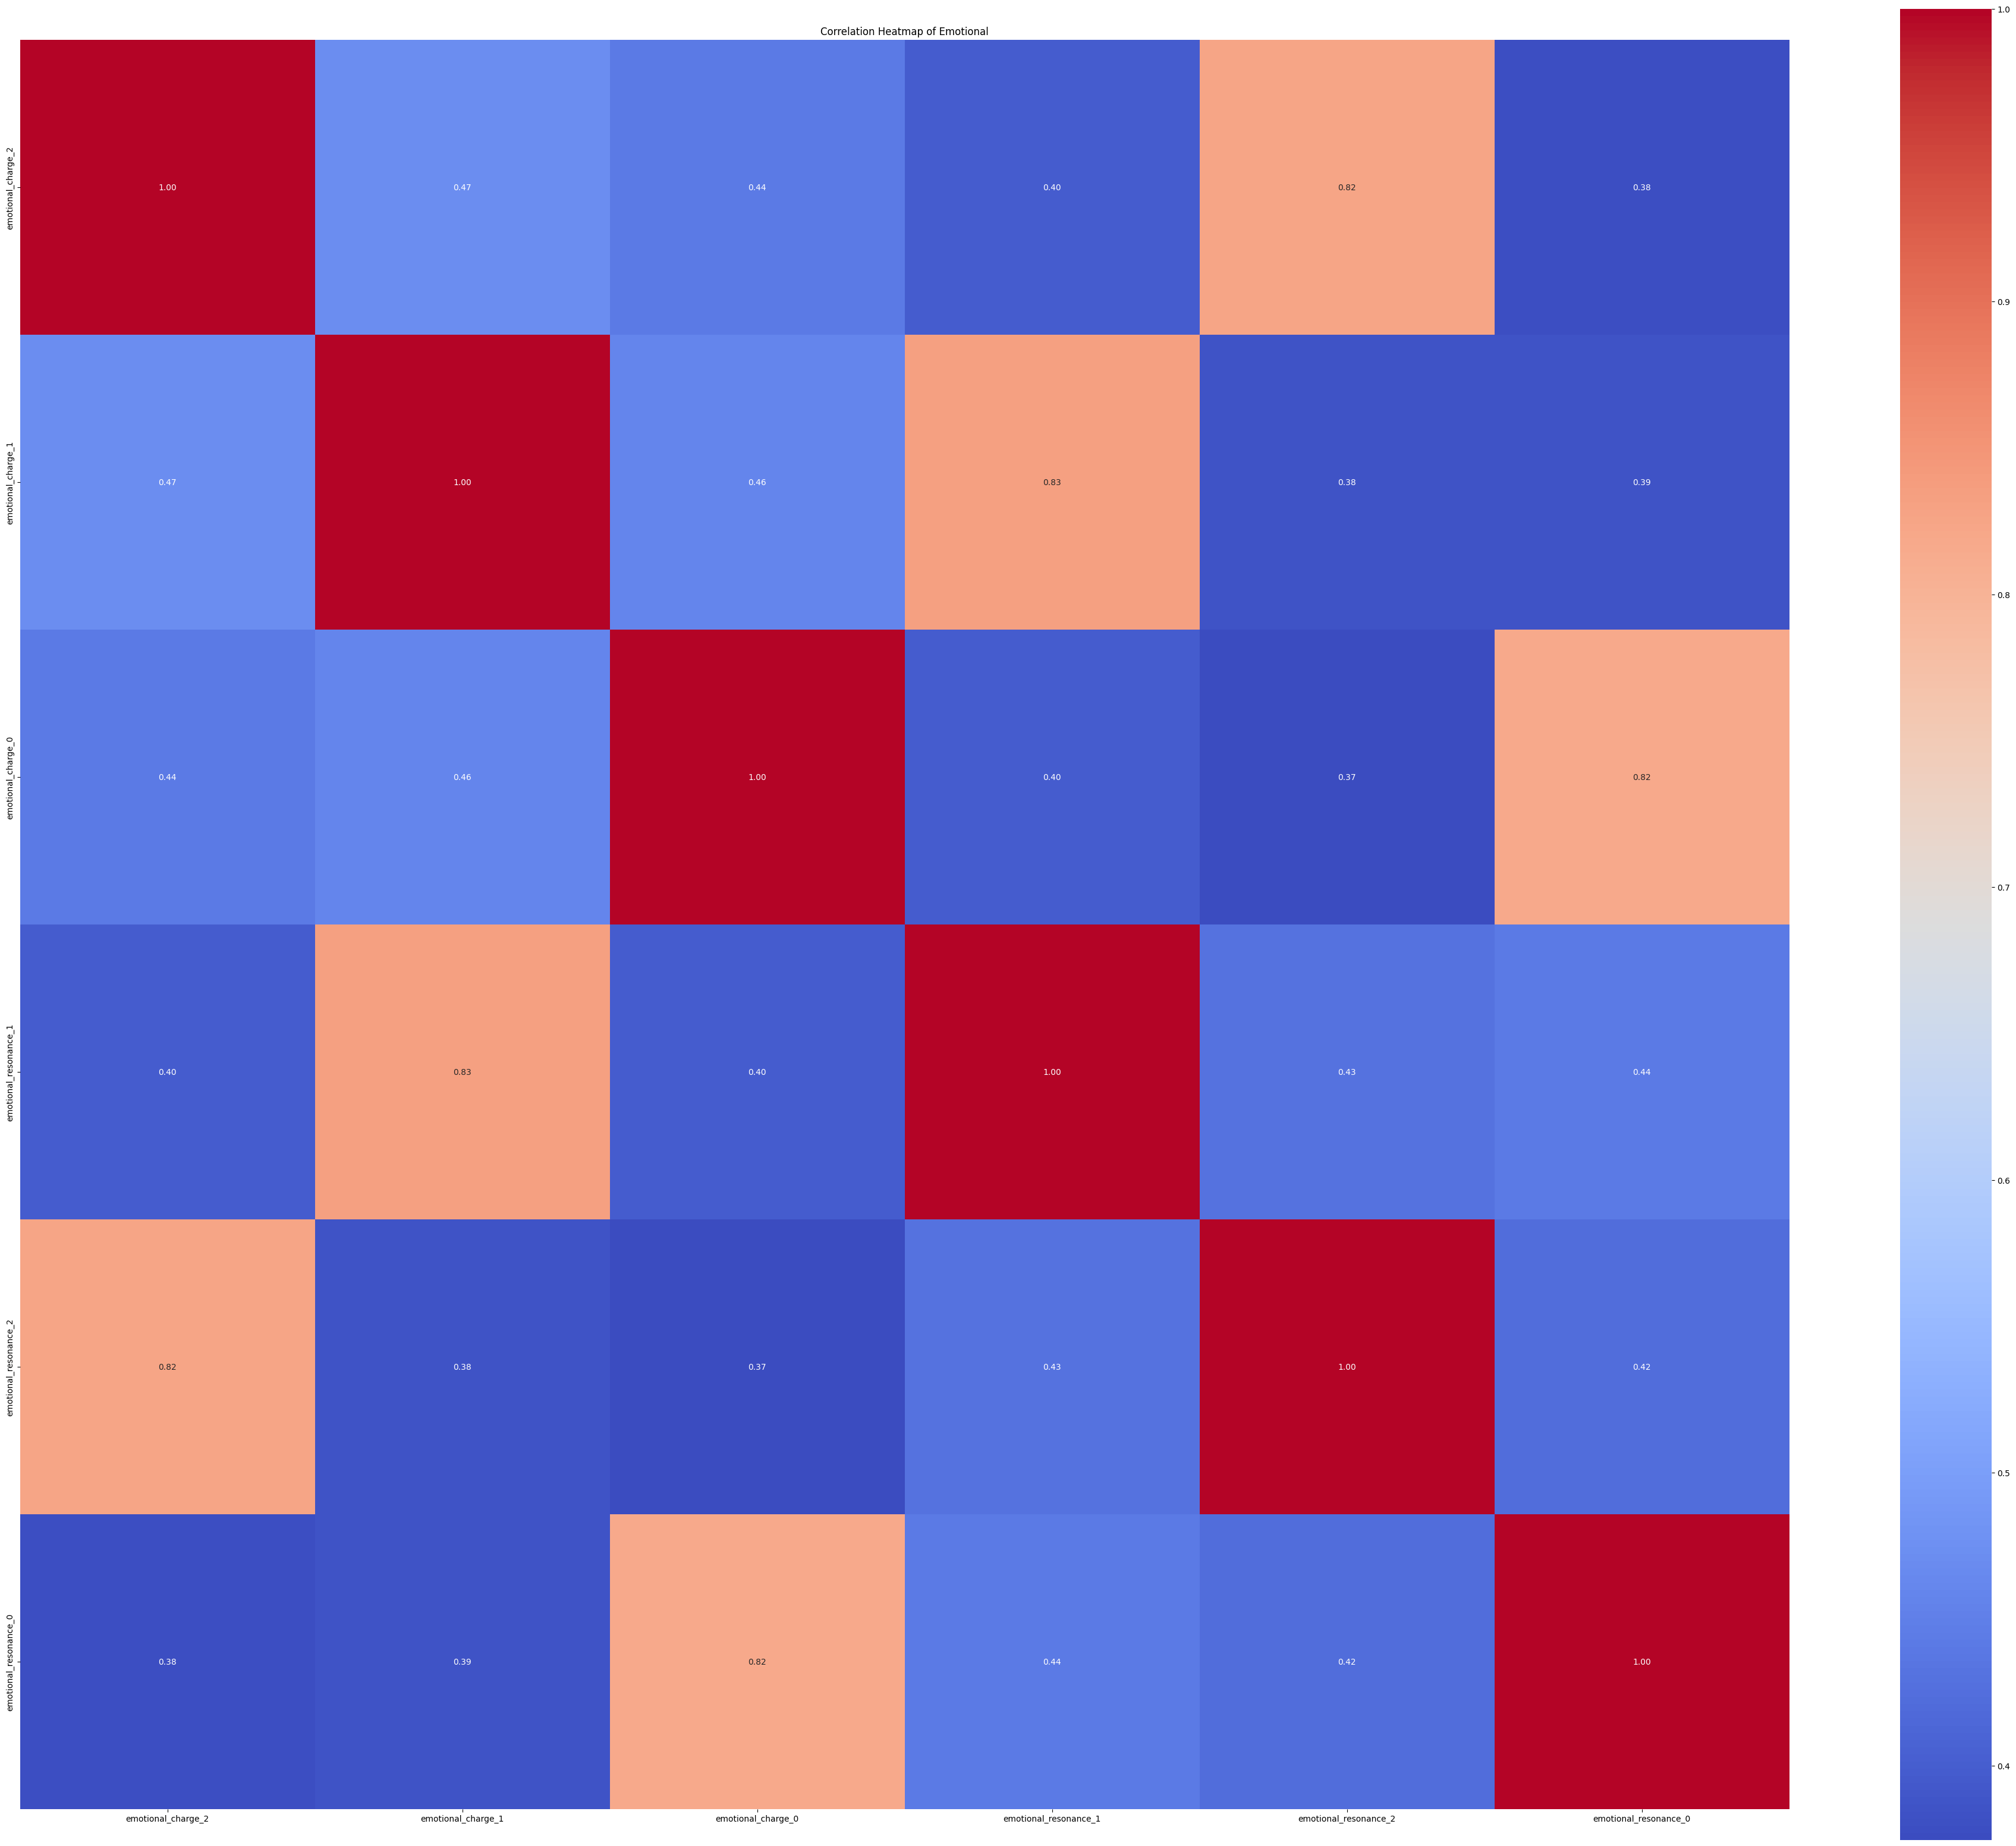

In [538]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[emotional_cols].corr()

plt.figure(figsize=(48, 40))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Emotional")
plt.show()

In [539]:
df_eng["emotional_gap_0"] = df_eng["emotional_charge_0"] - df_eng["emotional_resonance_0"]
df_eng["emotional_gap_1"] = df_eng["emotional_charge_1"] - df_eng["emotional_resonance_1"]
df_eng["emotional_gap_2"] = df_eng["emotional_charge_2"] - df_eng["emotional_resonance_2"]

In [540]:
df_test_eng["emotional_gap_0"] = df_test_eng["emotional_charge_0"] - df_test_eng["emotional_resonance_0"]
df_test_eng["emotional_gap_1"] = df_test_eng["emotional_charge_1"] - df_test_eng["emotional_resonance_1"]
df_test_eng["emotional_gap_2"] = df_test_eng["emotional_charge_2"] - df_test_eng["emotional_resonance_2"]

In [541]:
emotional_gap_cols = [col for col in df_eng.columns if 'emotional_gap' in col.lower()]

In [542]:
emotional_gap_cols

['emotional_gap_0', 'emotional_gap_1', 'emotional_gap_2']

In [543]:
df_eng['mean_emotional_gap '] = df_eng[emotional_gap_cols].mean(axis=1)

In [544]:
df_test_eng['mean_emotional_gap '] = df_test_eng[emotional_gap_cols].mean(axis=1)

## Rhythmic consistency features

In [545]:
rhythm_cols = [col for col in df_eng.columns if any(x in col.lower() for x in ['beat', 'tempo', 'rhythmic'])]
rhythm_cols

['beat_frequency_1',
 'beat_frequency_0',
 'beat_frequency_2',
 'rhythmic_cohesion_0',
 'rhythmic_cohesion_1',
 'tempo_volatility',
 'rhythmic_cohesion_2']

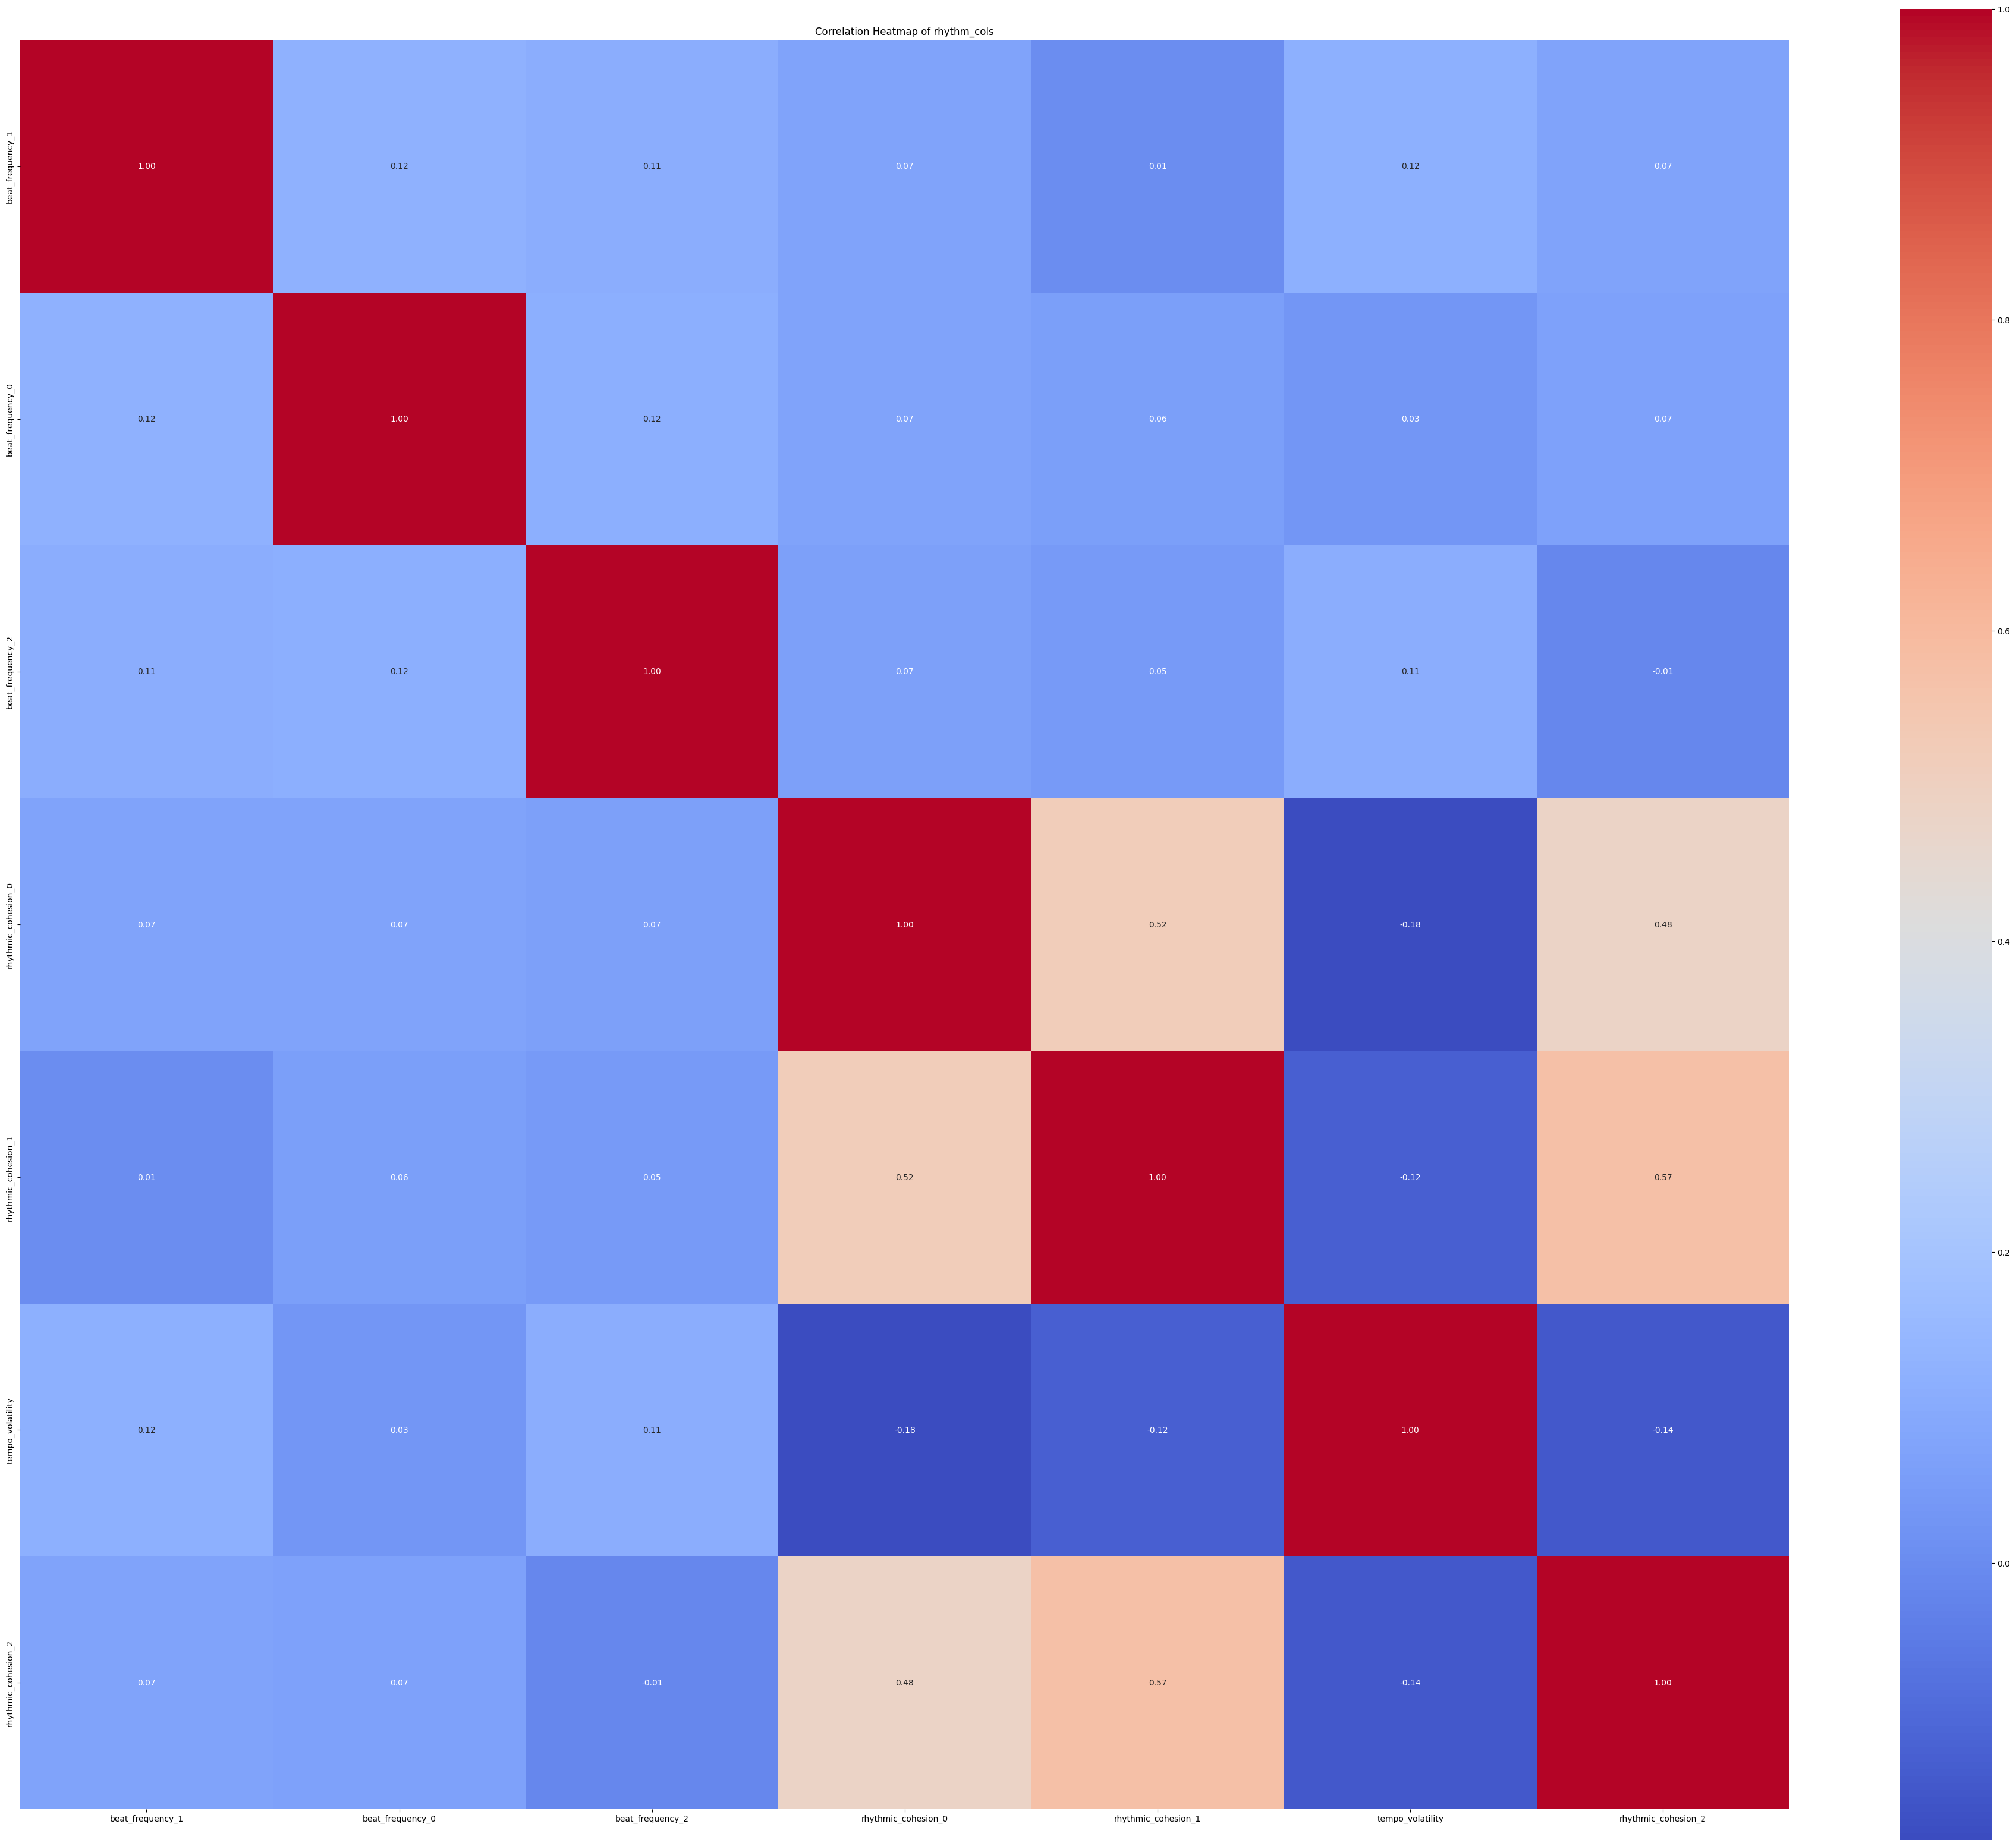

In [546]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[rhythm_cols].corr()

plt.figure(figsize=(48, 40))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of rhythm_cols")
plt.show()

In [547]:
df_eng["rhythmic_cohesion_mean"] = df_eng[["rhythmic_cohesion_0", "rhythmic_cohesion_1", "rhythmic_cohesion_2"]].mean(axis=1)

In [548]:
df_test_eng["rhythmic_cohesion_mean"] = df_test_eng[["rhythmic_cohesion_0", "rhythmic_cohesion_1", "rhythmic_cohesion_2"]].mean(axis=1)

In [549]:
df_eng["beat_frequency_mean"] = df_eng[["beat_frequency_0", "beat_frequency_1", "beat_frequency_2"]].mean(axis=1)

In [550]:
df_test_eng["beat_frequency_mean"] = df_test_eng[["beat_frequency_0", "beat_frequency_1", "beat_frequency_2"]].mean(axis=1)

## Tonal coherence

In [554]:
tonal_cols = [col for col in df_eng.columns if 'tonal' in col.lower() or 'harmonic' in col.lower()]

In [555]:
tonal_cols

['harmonic_scale_1',
 'tonal_mode_2',
 'tonal_mode_1',
 'tonal_mode_0',
 'harmonic_scale_0',
 'harmonic_scale_2']

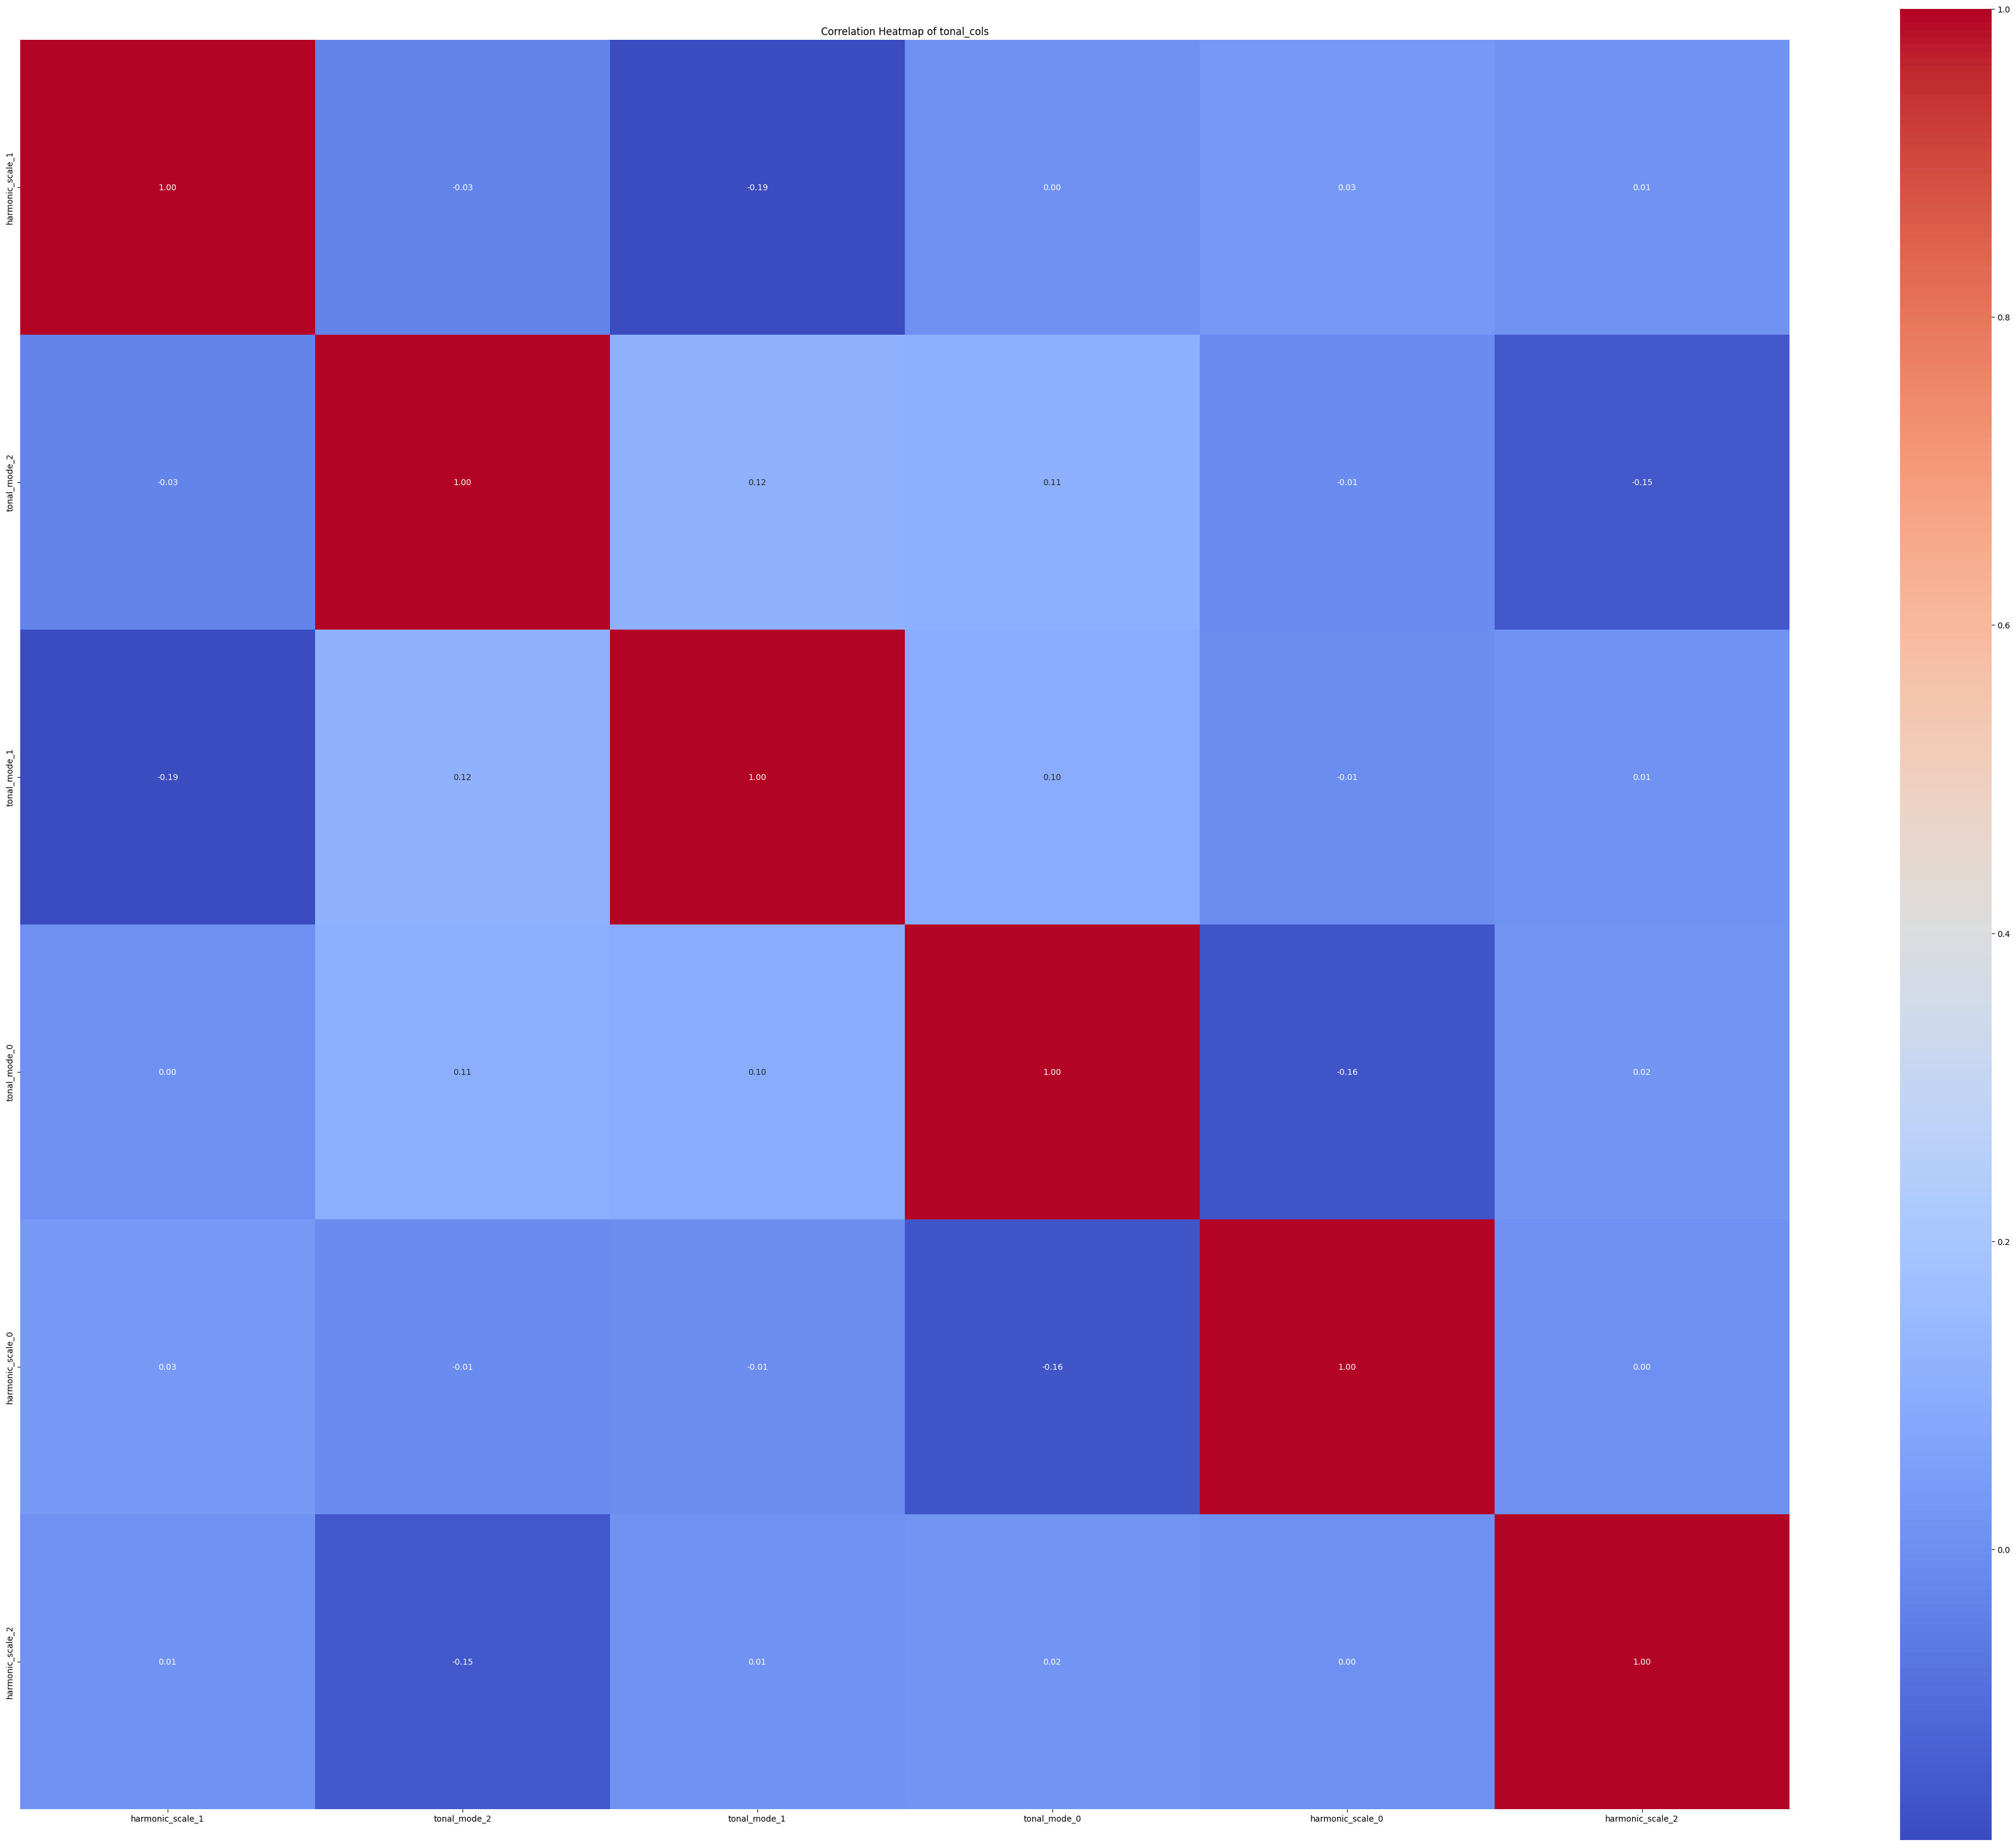

In [556]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_eng[tonal_cols].corr()

plt.figure(figsize=(48, 40))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of tonal_cols")
plt.show()

In [557]:
df_eng["harmonic_scale_mean"] = df_eng[["harmonic_scale_0", "harmonic_scale_1", "harmonic_scale_2"]].mean(axis=1)
df_eng["tonal_mode_mean"] = df_eng[["tonal_mode_0", "tonal_mode_1", "tonal_mode_2"]].mean(axis=1)

df_eng["harmonic_scale_std"] = df_eng[["harmonic_scale_0", "harmonic_scale_1", "harmonic_scale_2"]].std(axis=1)
df_eng["tonal_mode_std"] = df_eng[["tonal_mode_0", "tonal_mode_1", "tonal_mode_2"]].std(axis=1)


In [558]:
df_test_eng["harmonic_scale_mean"] = df_test_eng[["harmonic_scale_0", "harmonic_scale_1", "harmonic_scale_2"]].mean(axis=1)
df_test_eng["tonal_mode_mean"] = df_test_eng[["tonal_mode_0", "tonal_mode_1", "tonal_mode_2"]].mean(axis=1)

df_test_eng["harmonic_scale_std"] = df_test_eng[["harmonic_scale_0", "harmonic_scale_1", "harmonic_scale_2"]].std(axis=1)
df_test_eng["tonal_mode_std"] = df_test_eng[["tonal_mode_0", "tonal_mode_1", "tonal_mode_2"]].std(axis=1)

## Duration-based features

In [559]:
duration_cols = [col for col in df_eng.columns if 'duration' in col.lower()]
duration_cols

['duration_ms_0', 'duration_ms_2', 'duration_consistency', 'duration_ms_1']

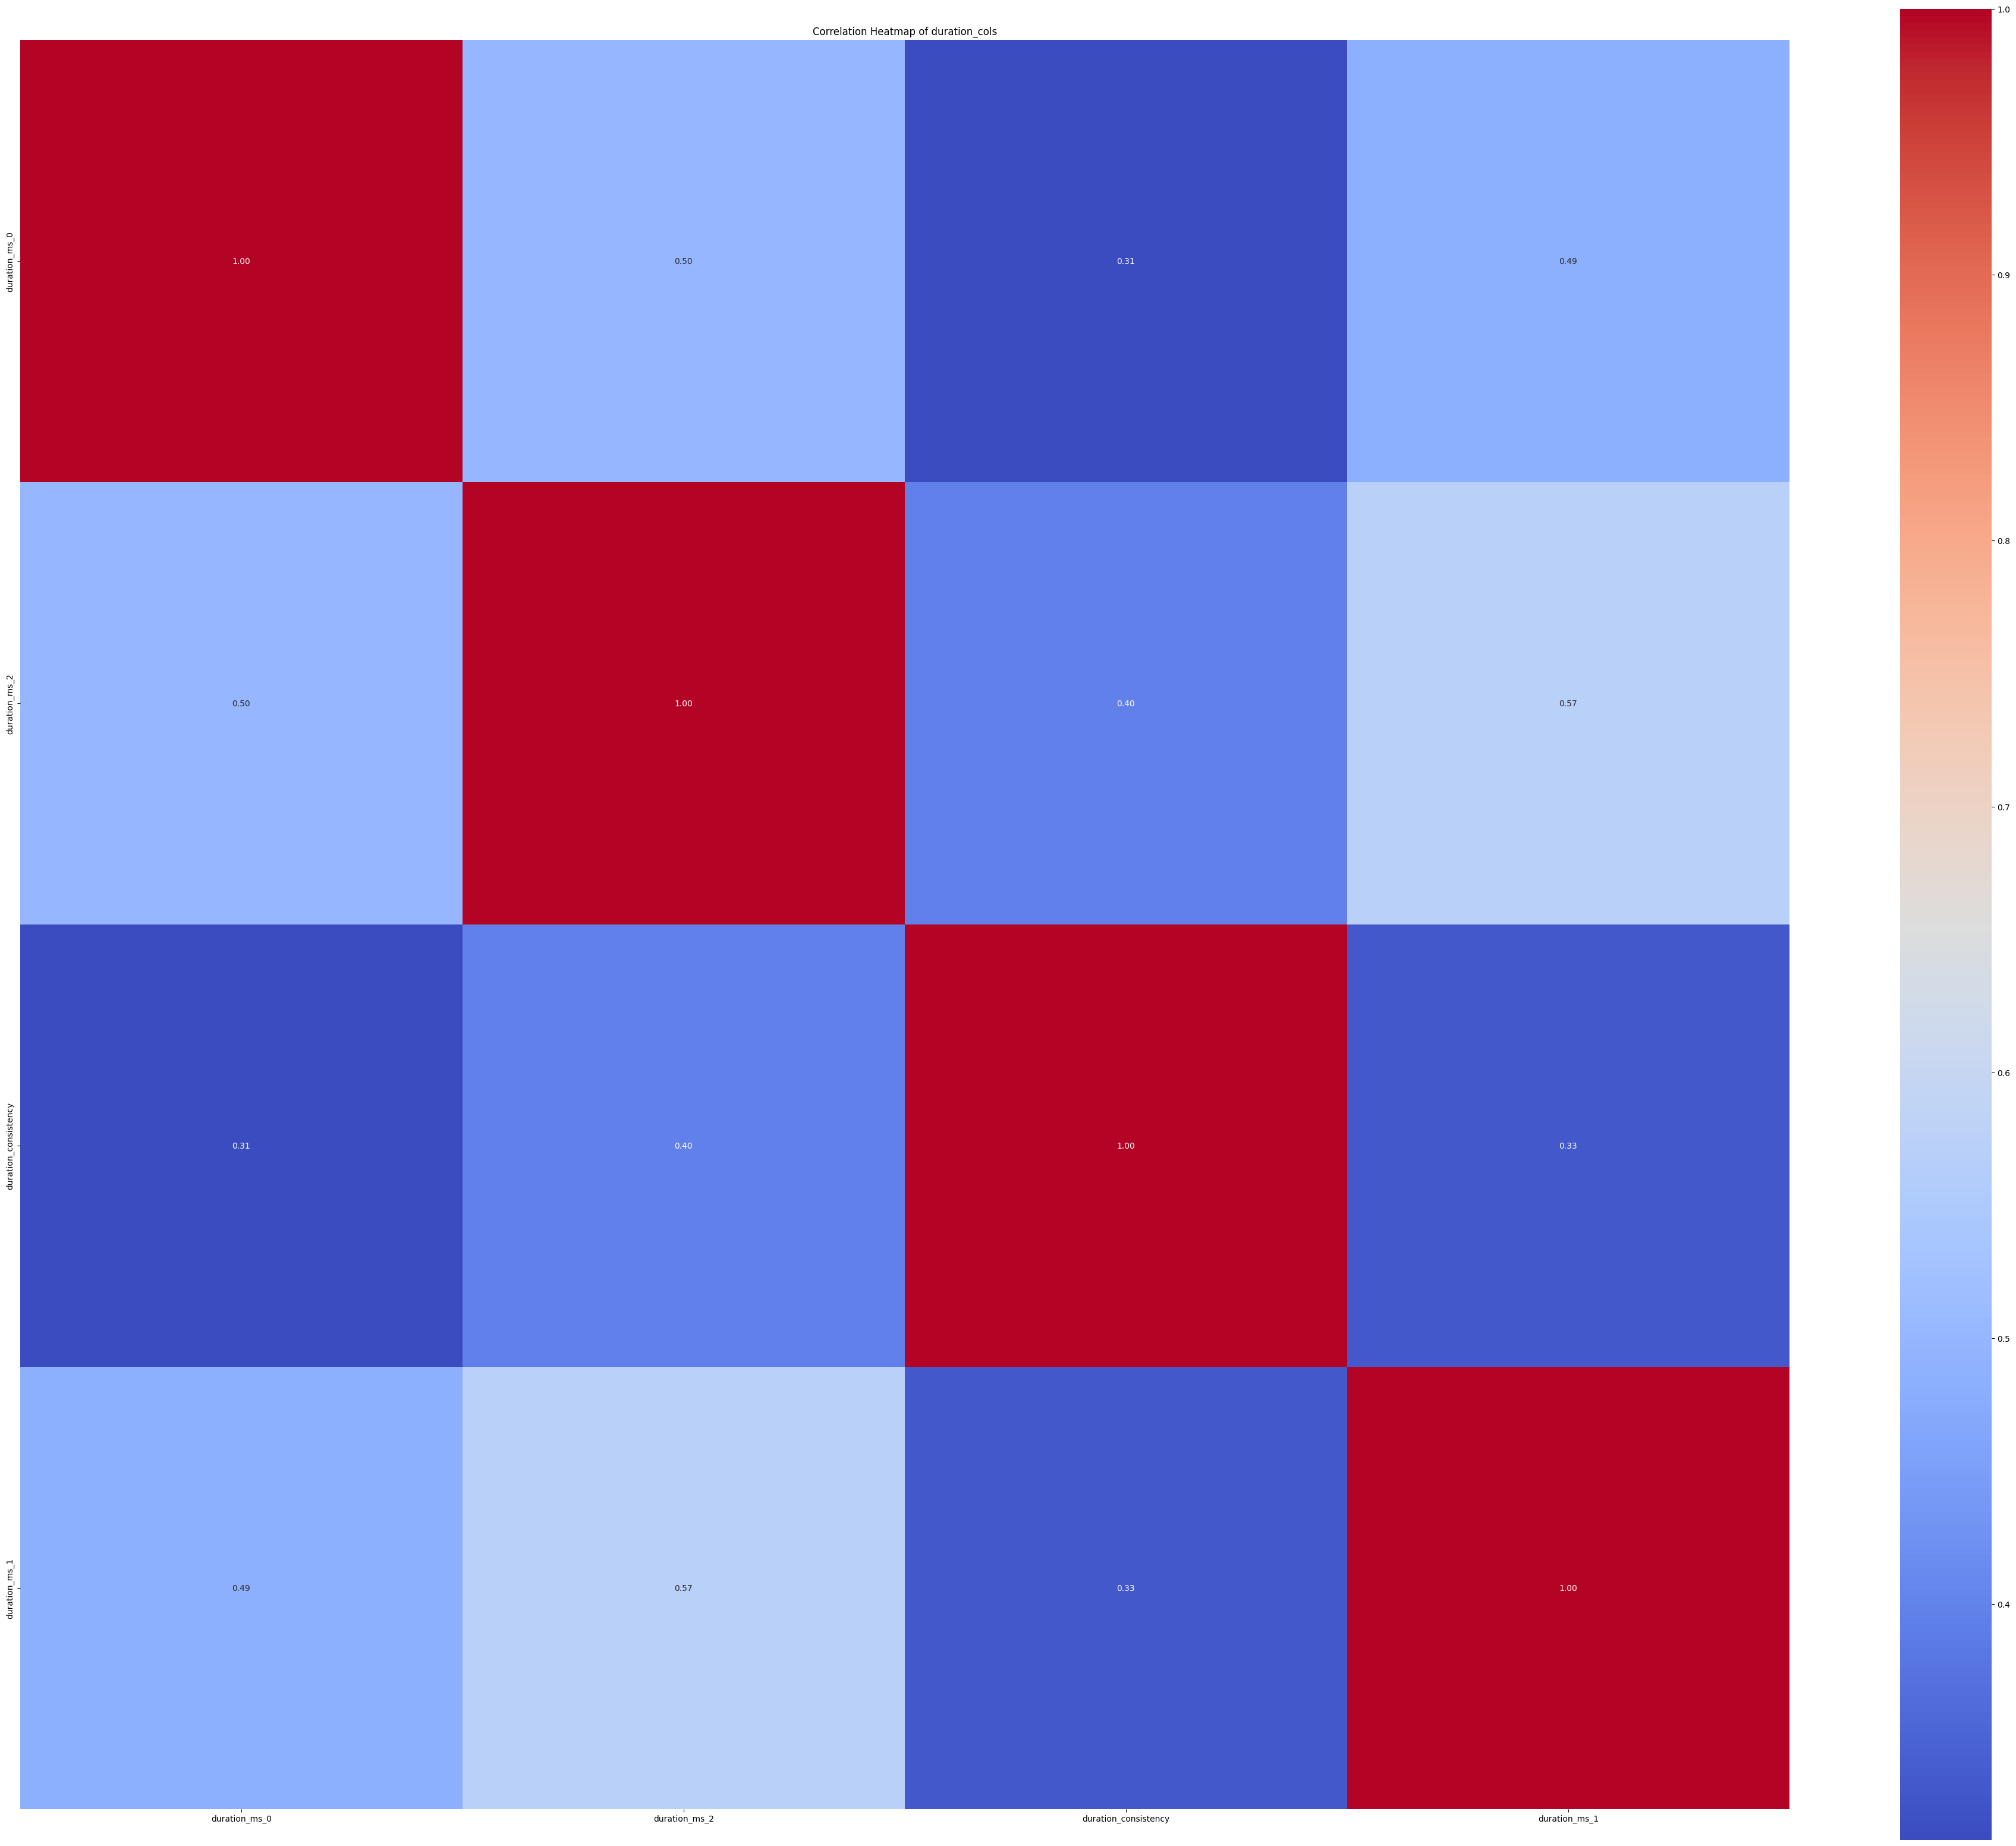

In [560]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_eng[duration_cols].corr()

plt.figure(figsize=(48, 40))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of duration_cols")
plt.show()

In [561]:
df_eng["duration_mean"] = df_eng[["duration_ms_0", "duration_ms_1", "duration_ms_2"]].mean(axis=1)
df_eng["duration_std"] = df_eng[["duration_ms_0", "duration_ms_1", "duration_ms_2"]].std(axis=1)
df_eng["duration_cv"] = df_eng["duration_std"] / (df_eng["duration_mean"] + 1e-6)

In [562]:
df_test_eng["duration_mean"] = df_test_eng[["duration_ms_0", "duration_ms_1", "duration_ms_2"]].mean(axis=1)
df_test_eng["duration_std"] = df_test_eng[["duration_ms_0", "duration_ms_1", "duration_ms_2"]].std(axis=1)
df_test_eng["duration_cv"] = df_test_eng["duration_std"] / (df_test_eng["duration_mean"] + 1e-6)

## Intensity patterns

In [563]:
intensity_cols = [col for col in df_eng.columns if 'intensity' in col.lower()]
intensity_cols


['intensity_index_0', 'intensity_index_1', 'intensity_index_2']

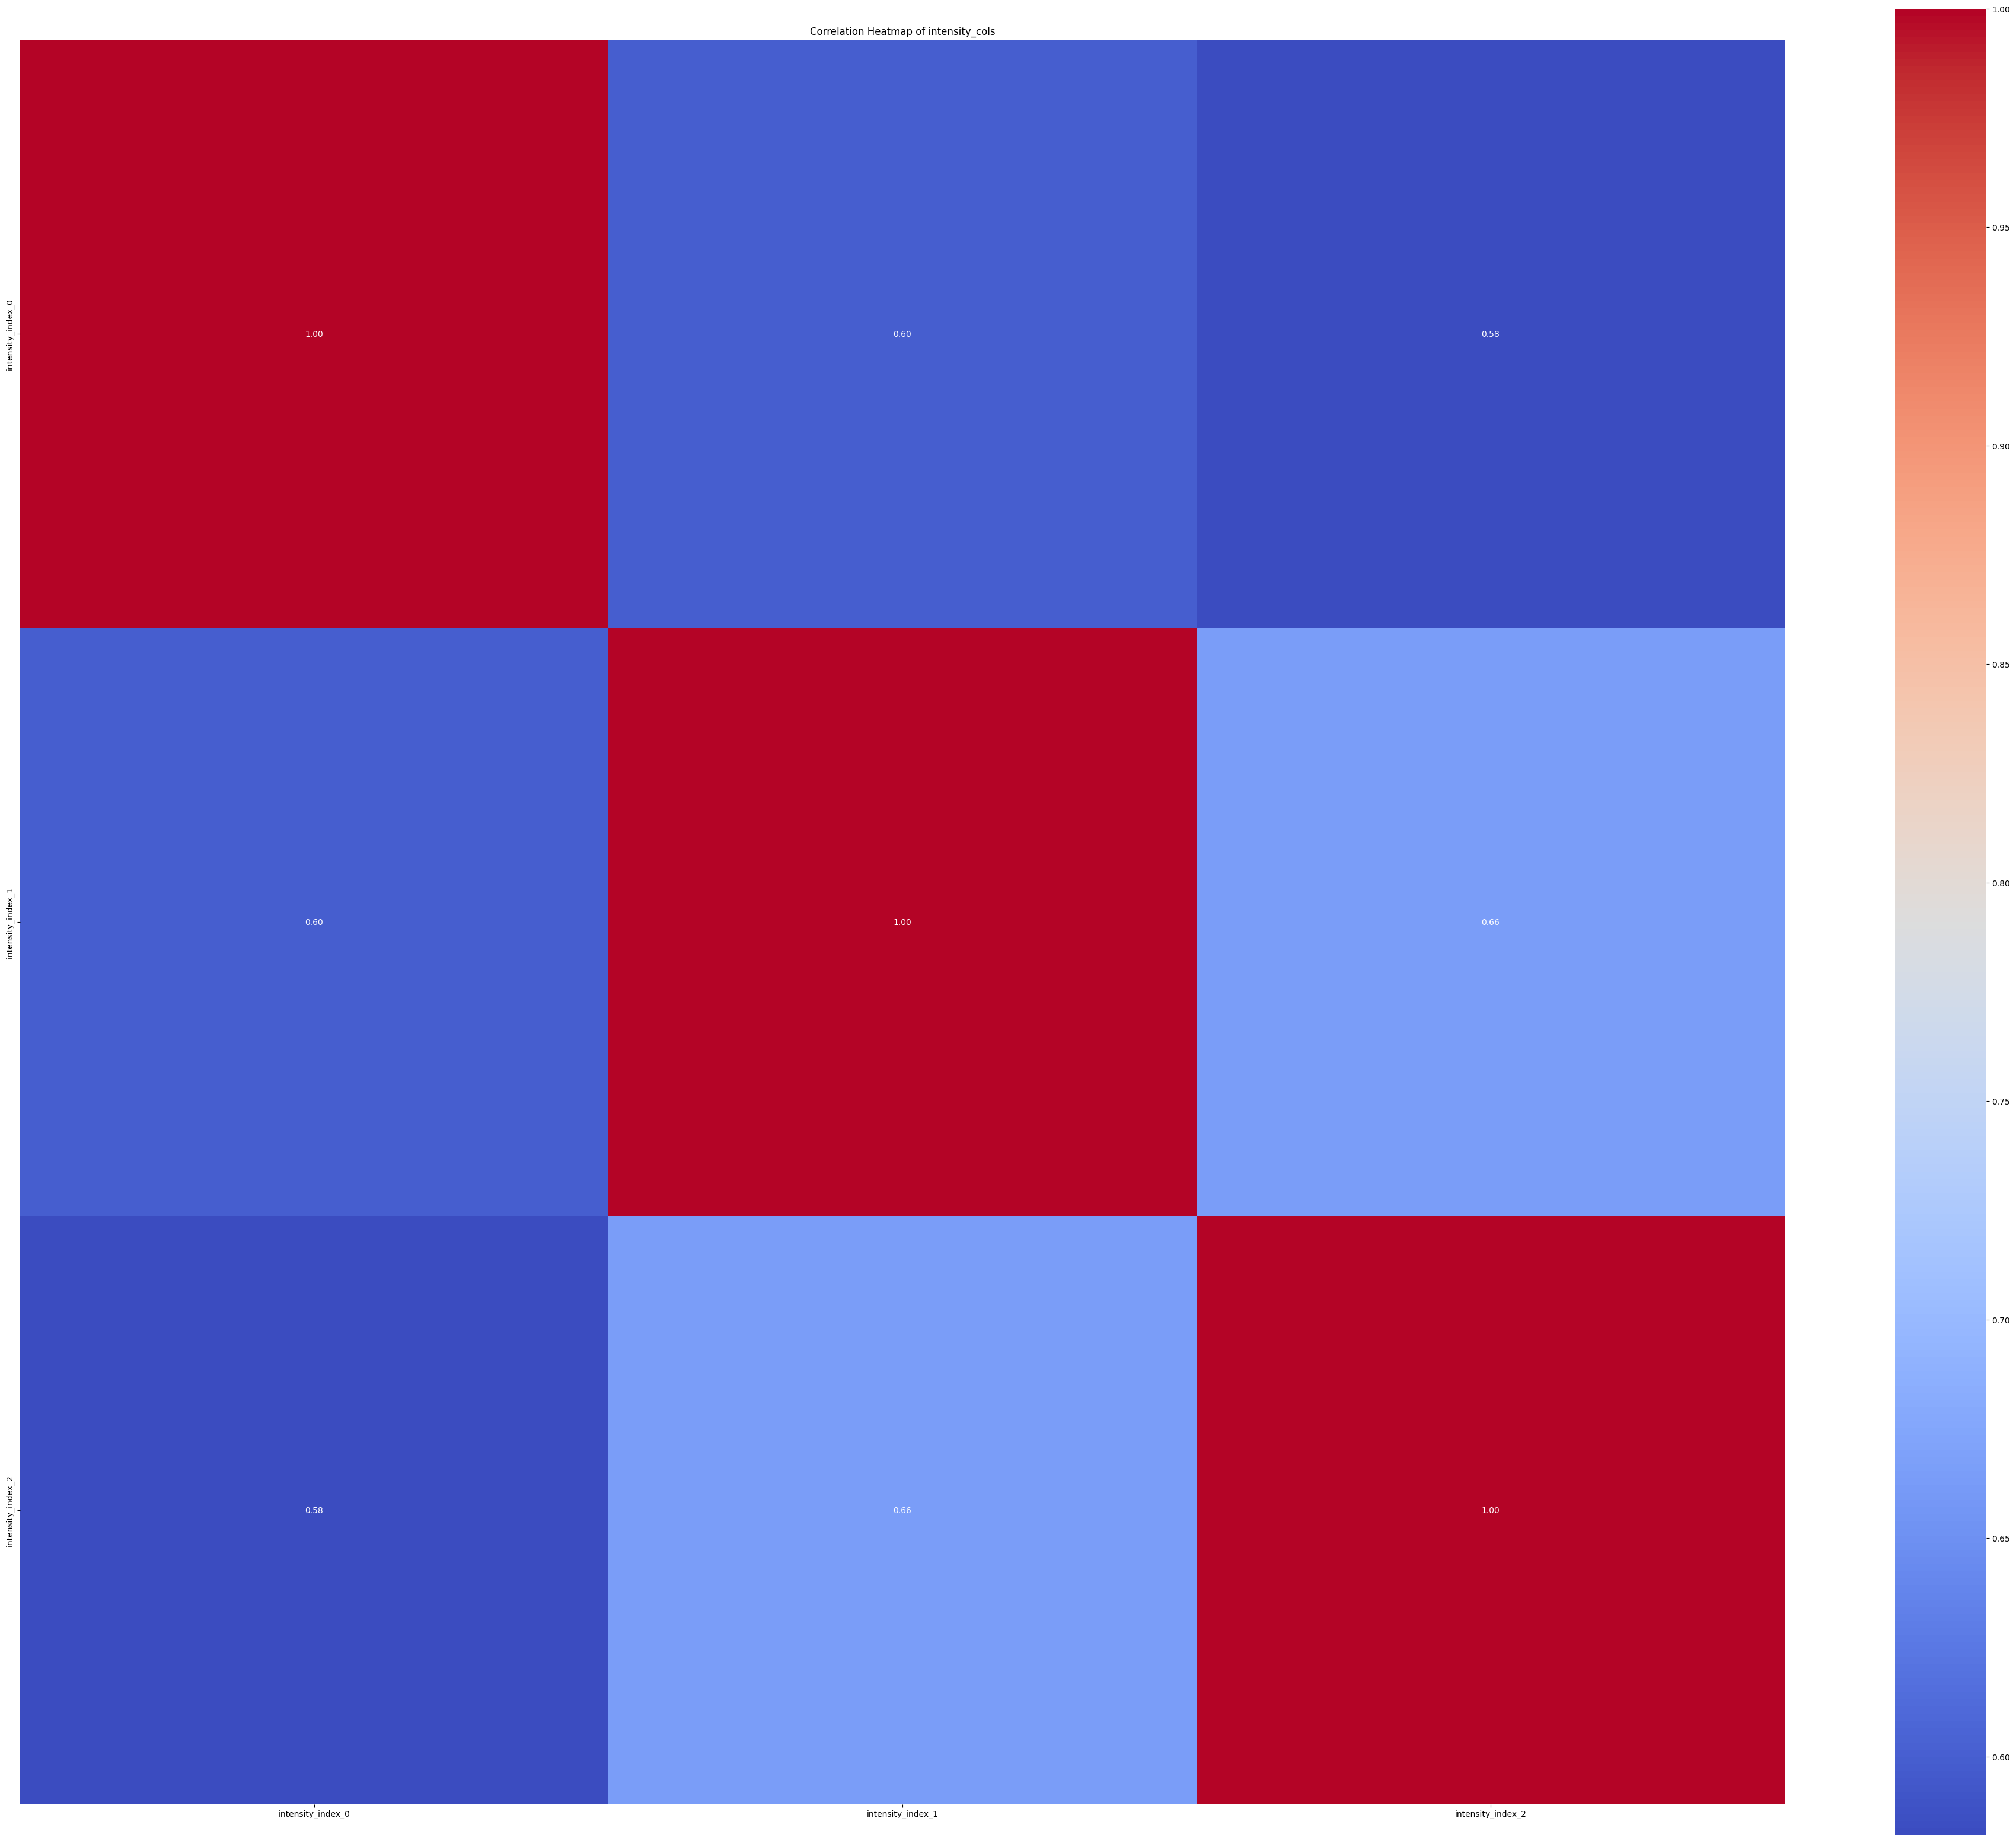

In [564]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_eng[intensity_cols].corr()

plt.figure(figsize=(48, 40))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of intensity_cols")
plt.show()

In [565]:
df_eng["intensity_mean"] = df_eng[intensity_cols].mean(axis=1)
df_eng["intensity_std"] = df_eng[intensity_cols].std(axis=1)
df_eng["intensity_cv"] = df_eng["intensity_std"] / (df_eng["intensity_mean"] + 1e-6)

In [566]:
df_test_eng["intensity_mean"] = df_test_eng[intensity_cols].mean(axis=1)
df_test_eng["intensity_std"] = df_test_eng[intensity_cols].std(axis=1)
df_test_eng["intensity_cv"] = df_test_eng["intensity_std"] / (df_test_eng["intensity_mean"] + 1e-6)

In [567]:
df_eng["intensity_min"] = df_eng[intensity_cols].min(axis=1)
df_eng["intensity_max"] = df_eng[intensity_cols].max(axis=1)
df_eng["intensity_range"] = df_eng["intensity_max"] - df_eng["intensity_min"]

In [568]:
df_test_eng["intensity_min"] = df_test_eng[intensity_cols].min(axis=1)
df_test_eng["intensity_max"] = df_test_eng[intensity_cols].max(axis=1)
df_test_eng["intensity_range"] = df_test_eng["intensity_max"] - df_test_eng["intensity_min"]

##  Authenticity vs Production Quality

In [569]:
        auth_cols = [col for col in df_eng.columns if 'authenticity' in col.lower()]
        organic_cols = [col for col in df_eng.columns if 'organic' in col.lower()]
auth_cols,organic_cols

(['performance_authenticity_2',
  'performance_authenticity_0',
  'performance_authenticity_1'],
 ['organic_texture_2',
  'organic_texture_0',
  'organic_immersion_0',
  'organic_immersion_2',
  'organic_texture_1',
  'organic_immersion_1'])

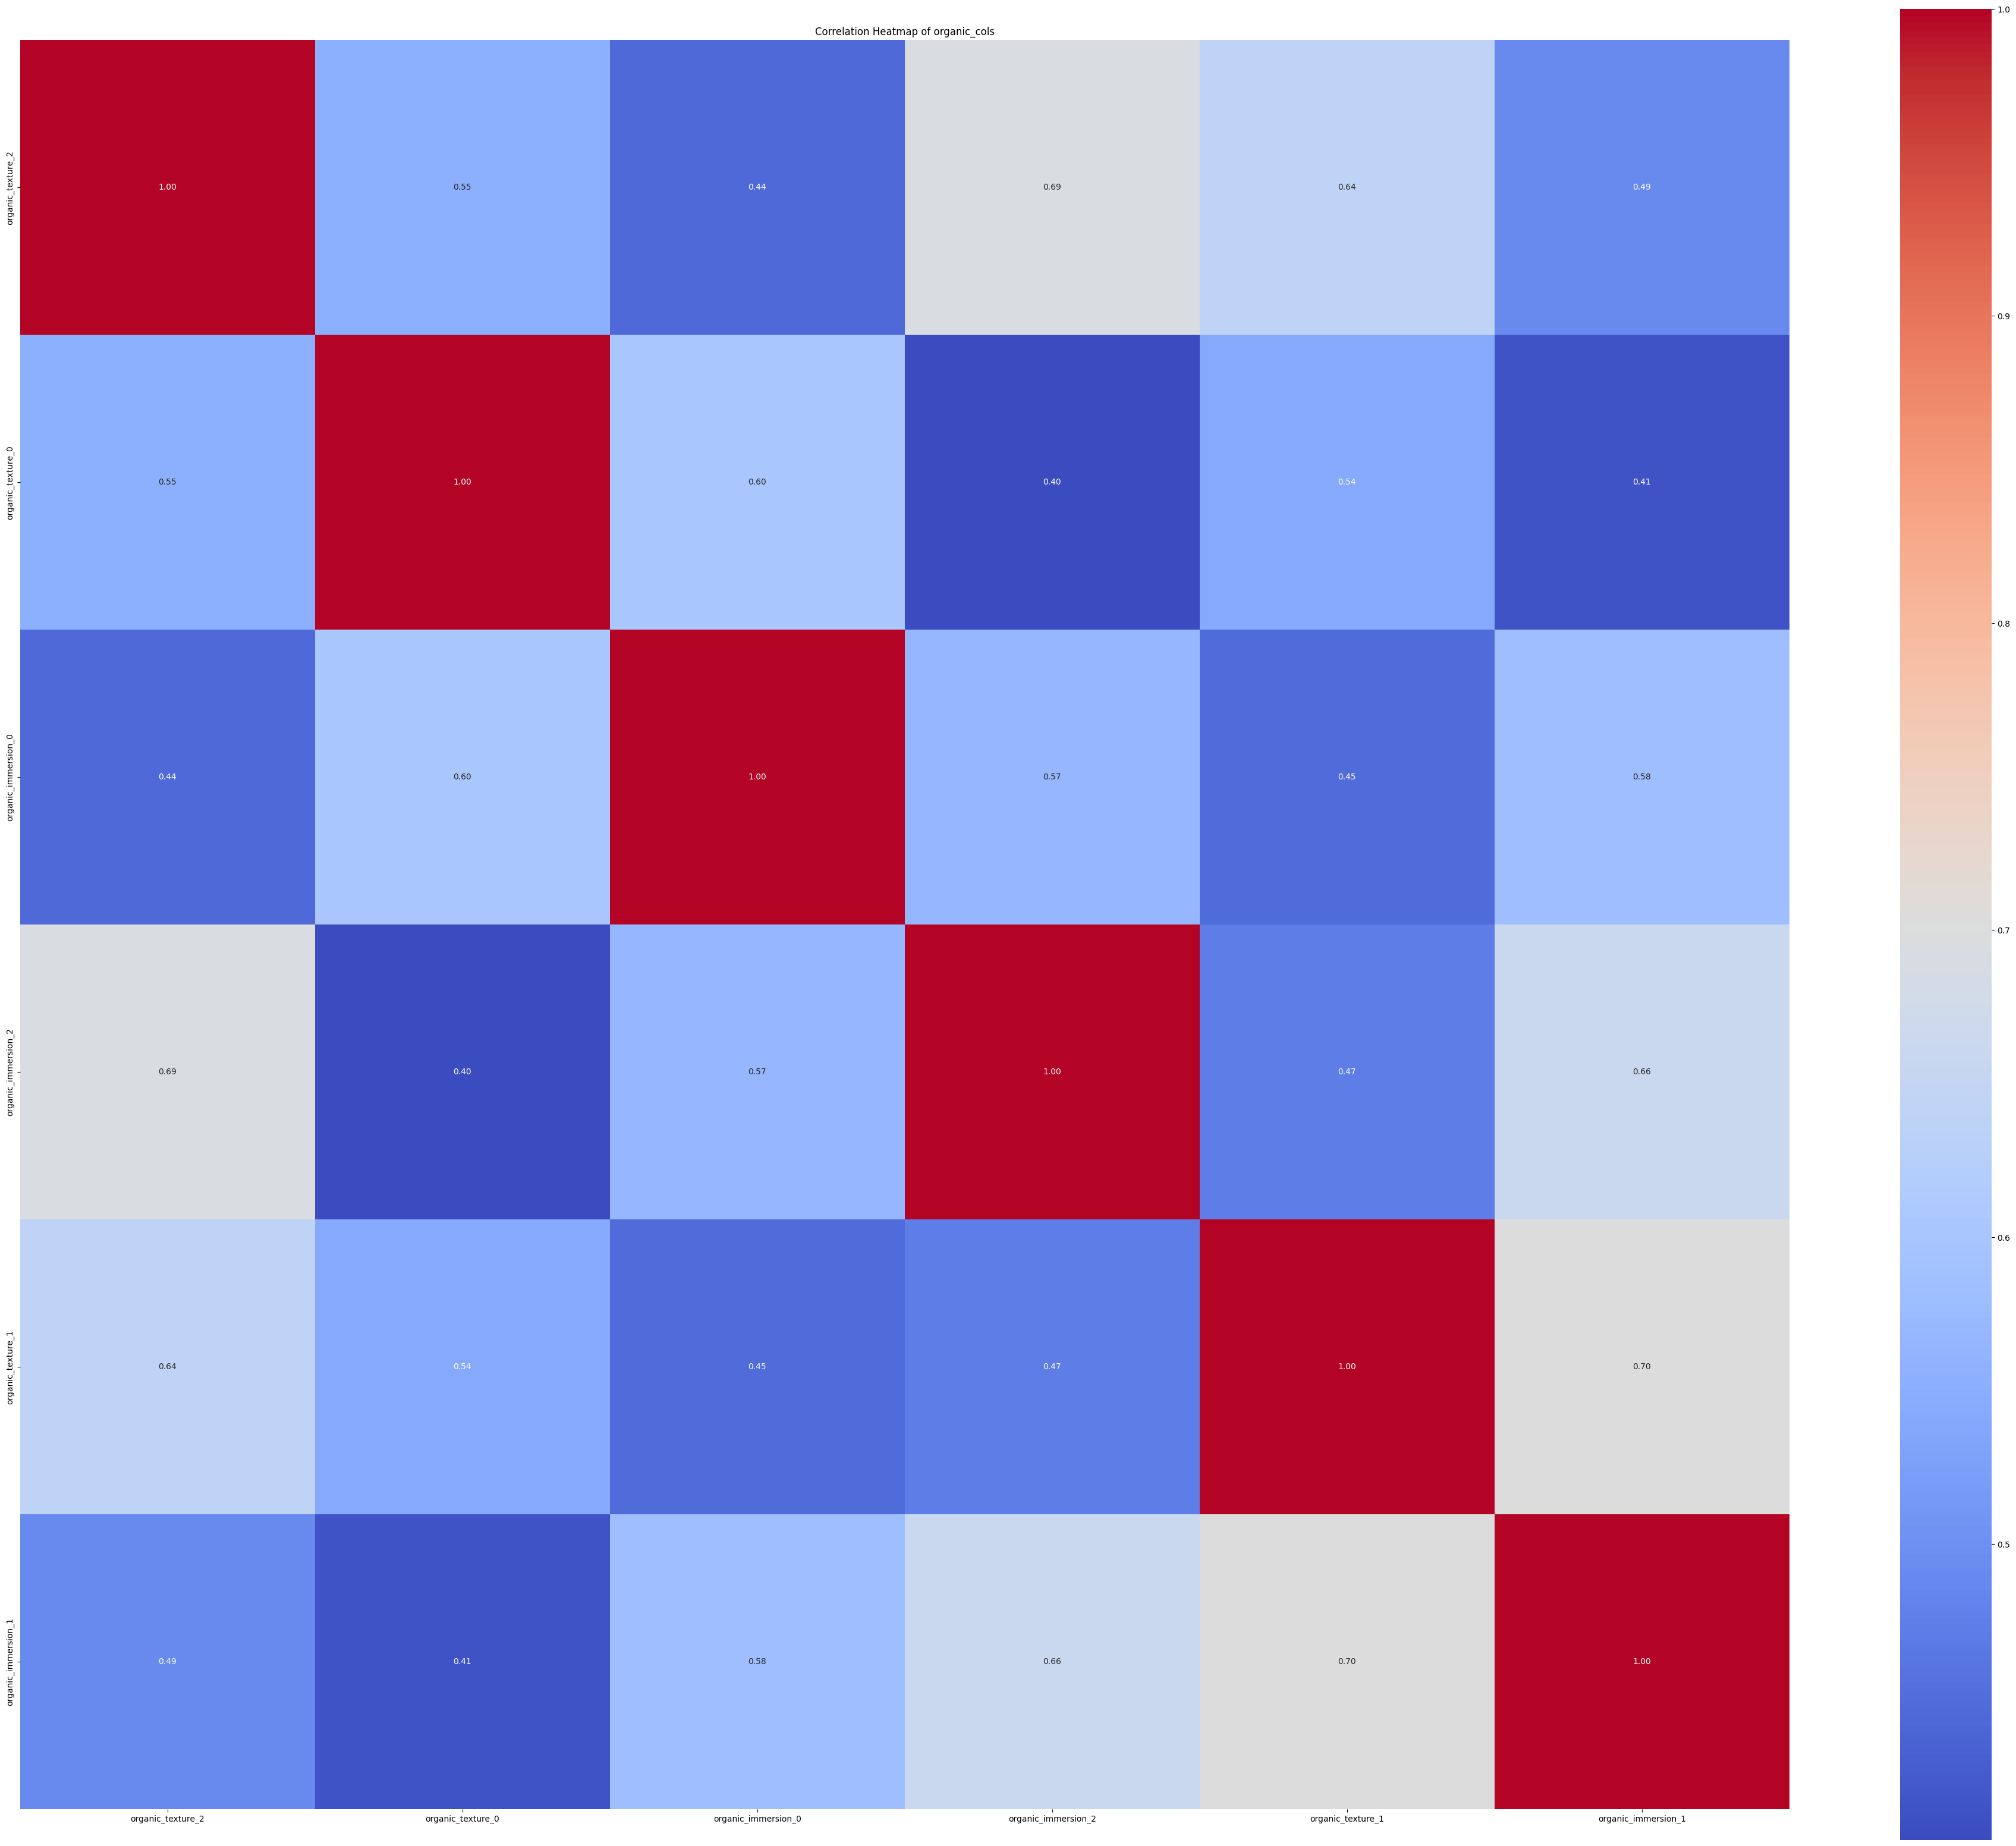

In [570]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_eng[organic_cols].corr()

plt.figure(figsize=(48, 40))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of organic_cols")
plt.show()

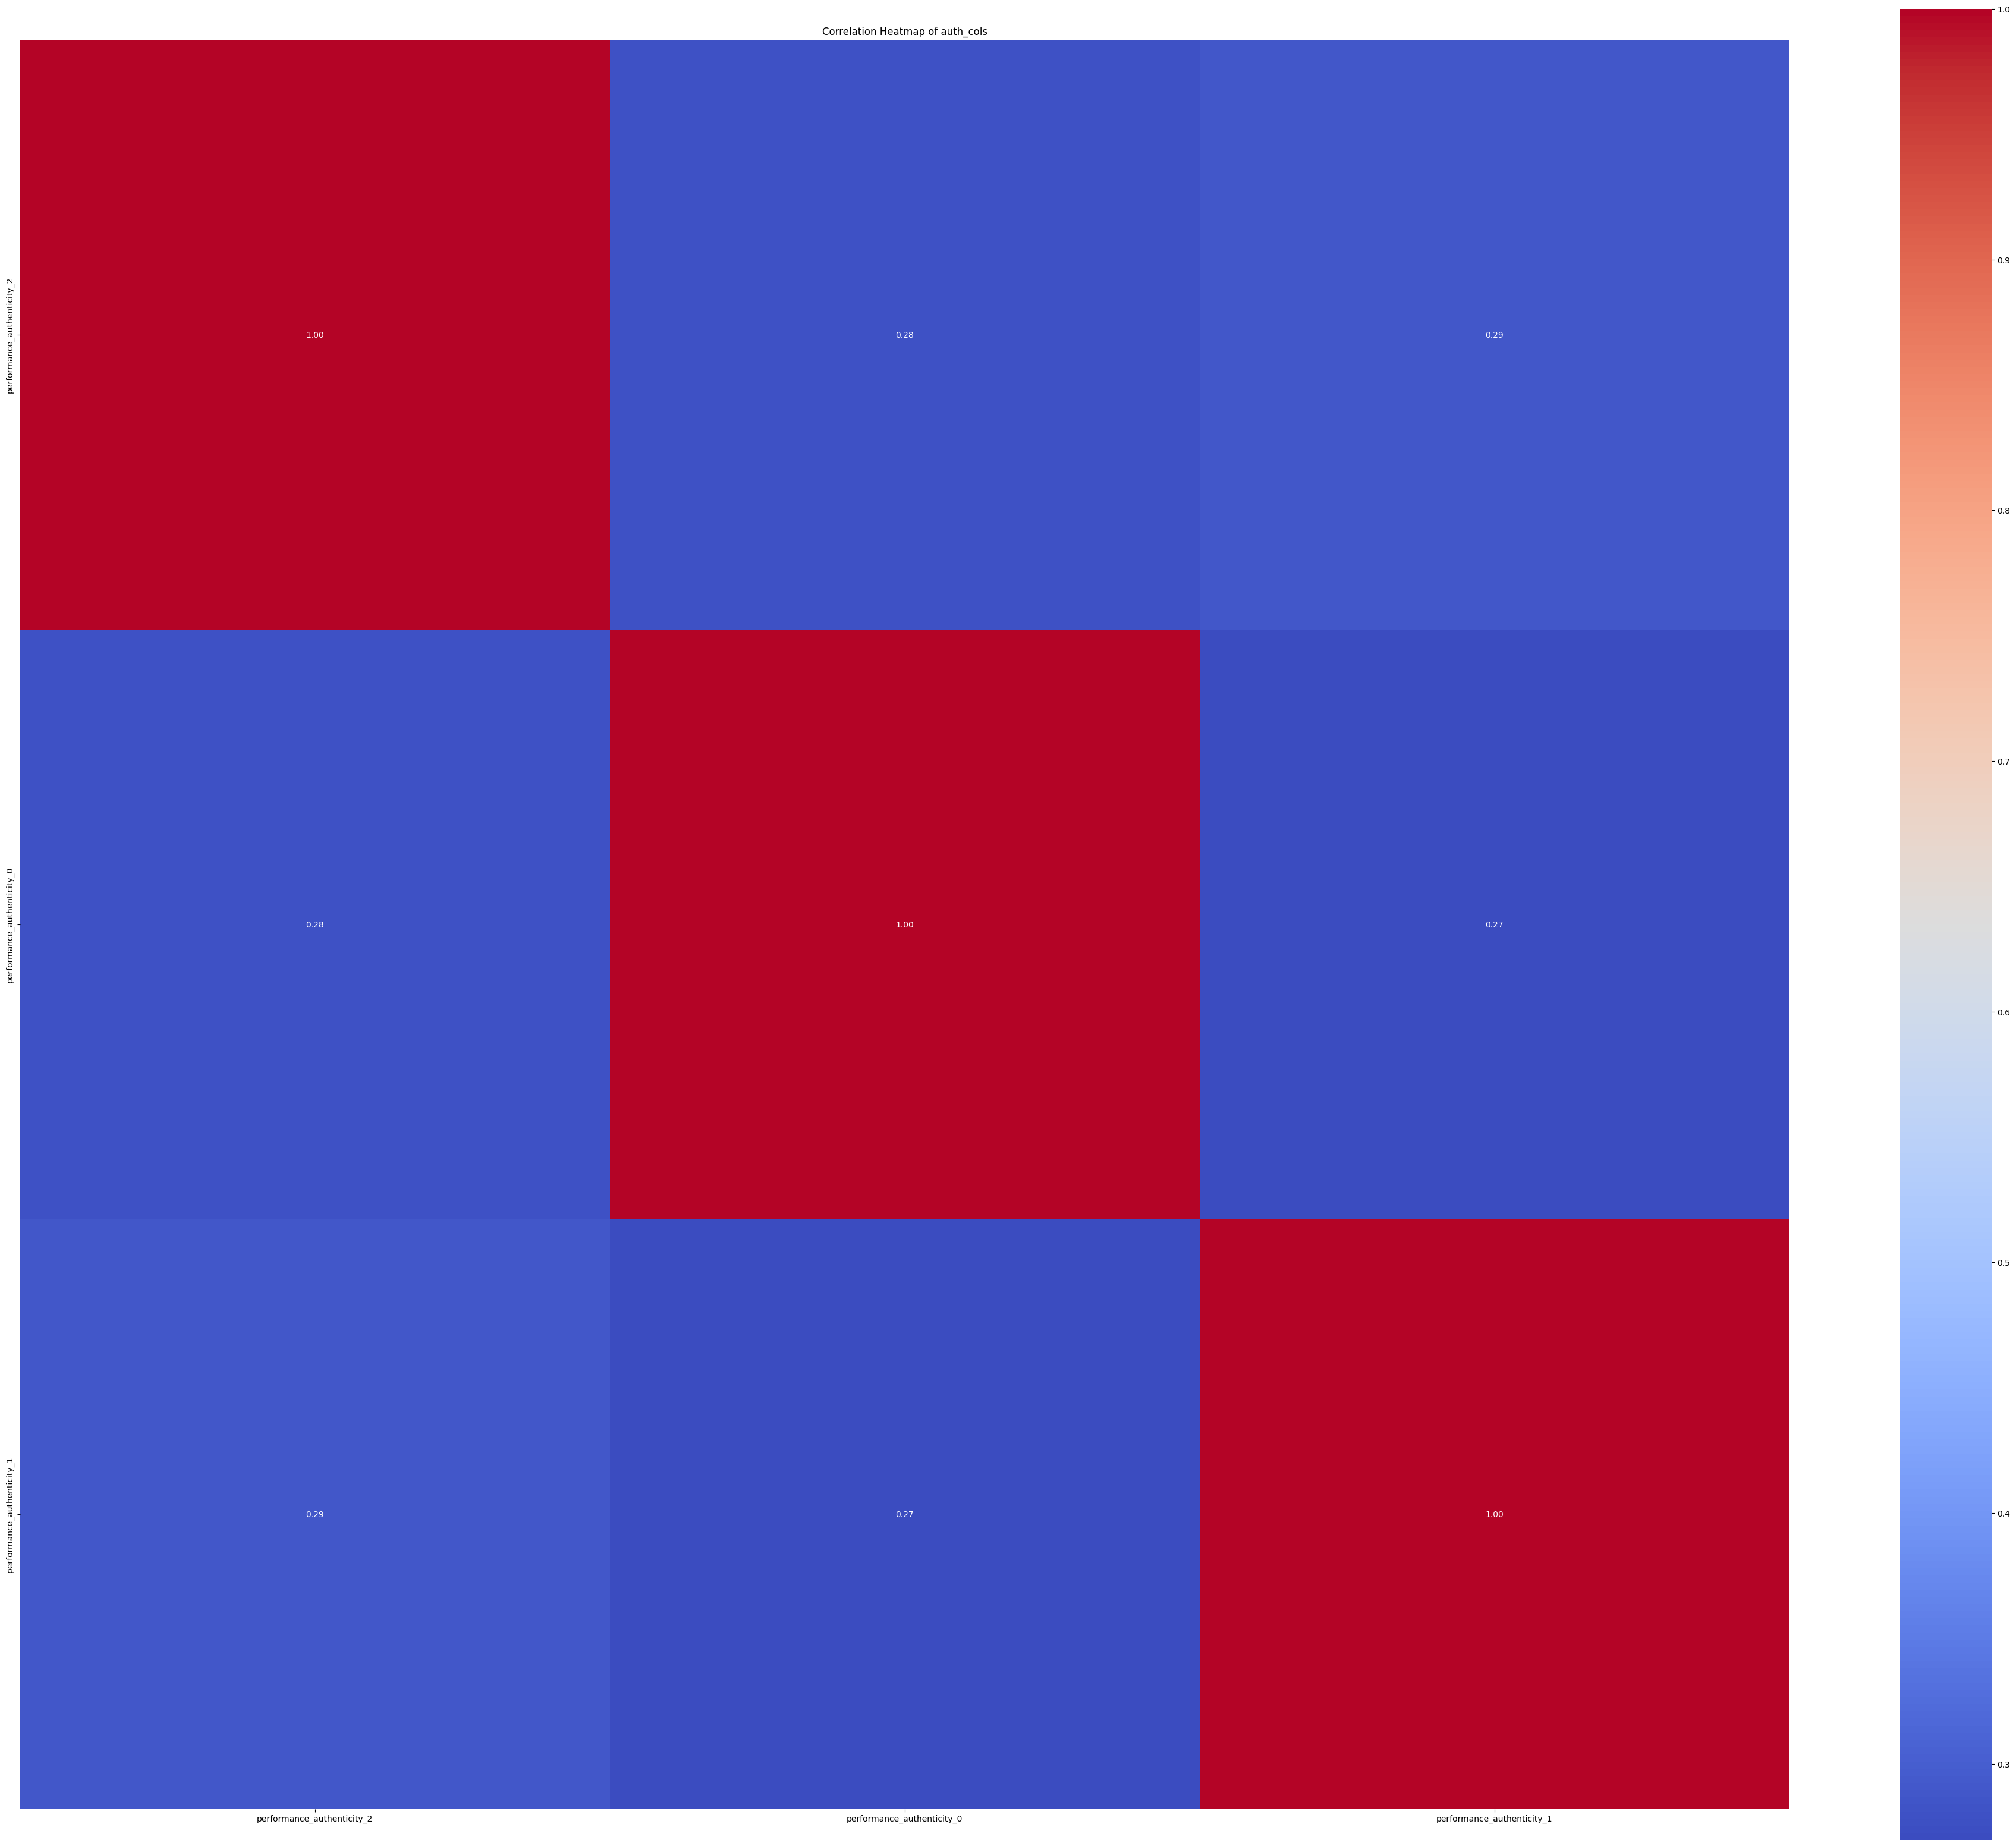

In [571]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_eng[auth_cols].corr()

plt.figure(figsize=(48, 40))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of auth_cols")
plt.show()

In [572]:
df_eng['authenticity_score'] = df_eng[auth_cols].mean(axis=1)
df_eng['organic_score'] = df_eng[organic_cols].mean(axis=1)
df_eng['production_balance'] = df_eng['authenticity_score'] / (df_eng['organic_score'] + 1e-6)

In [573]:
df_test_eng['authenticity_score'] = df_test_eng[auth_cols].mean(axis=1)
df_test_eng['organic_score'] = df_test_eng[organic_cols].mean(axis=1)
df_test_eng['production_balance'] = df_test_eng['authenticity_score'] / (df_test_eng['organic_score'] + 1e-6)

##  Genre complexity indicators

In [574]:
df_eng['collaboration_complexity'] = df_eng['artist_count'] * df_eng['album_component_count']

In [575]:
df_test_eng['collaboration_complexity'] = df_test_eng['artist_count'] * df_test_eng['album_component_count']

In [576]:
df_eng['collaboration_complexity']

0        12.642181
1         6.000000
2        28.000000
3        30.000000
4        34.000000
           ...    
61604    20.000000
61605    24.000000
61606    56.000000
61607    24.000000
61608    12.000000
Name: collaboration_complexity, Length: 61609, dtype: float64

## Seasonal and lunar interaction

In [577]:
print("Season of Release - Value Counts:")
print(df["season_of_release"].value_counts(dropna=False))

print("\nLunar Phase - Value Counts:")
print(df["lunar_phase"].value_counts(dropna=False))


Season of Release - Value Counts:
season_of_release
summer    16613
autumn    15871
winter    15154
spring    13971
Name: count, dtype: int64

Lunar Phase - Value Counts:
lunar_phase
waning    16267
waxing    15149
full      15138
new       15055
Name: count, dtype: int64


In [578]:
df_eng['seasonal_lunar'] = df_eng['season_of_release'].astype(str) + "_" + df_eng['lunar_phase'].astype(str)

In [579]:
df_test_eng['seasonal_lunar'] = df_test_eng['season_of_release'].astype(str) + "_" + df_eng['lunar_phase'].astype(str)

In [580]:
print('music_cluster' in df_eng.columns)
print('composition_label_0' in df_test_eng.columns)

False
True


In [581]:
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # Identify numerical columns for clustering
# numerical_for_clustering = df_eng.select_dtypes(include=[np.number]).columns.tolist()

# # Remove target column and 'id' if present
# if 'target' in numerical_for_clustering:
#     numerical_for_clustering.remove('target')
# if 'id' in numerical_for_clustering:
#     numerical_for_clustering.remove('id')

# # Fill missing values for clustering
# cluster_data = df_eng[numerical_for_clustering].fillna(df_eng[numerical_for_clustering].mean())

# # Standardize for clustering
# scaler = StandardScaler()
# cluster_data_scaled = scaler.fit_transform(cluster_data)

# # K-means clustering
# kmeans = KMeans(n_clusters=8, random_state=42)
# df_eng['music_cluster'] = kmeans.fit_predict(cluster_data_scaled)
# df_test_eng['music_cluster'] = kmeans.fit_predict(cluster_data_scaled)

# # Distance to cluster centers
# distances = kmeans.transform(cluster_data_scaled)
# df_eng['cluster_distance'] = np.min(distances, axis=1)
# df_eng['cluster_isolation'] = np.std(distances, axis=1)

# df_test_eng['cluster_distance'] = np.min(distances, axis=1)
# df_test_eng['cluster_isolation'] = np.std(distances, axis=1)
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Identify numerical columns for clustering
numerical_for_clustering = df_eng.select_dtypes(include=[np.number]).columns.tolist()

# Remove target column and 'id' if present
for col in ['target', 'id']:
    if col in numerical_for_clustering:
        numerical_for_clustering.remove(col)

# Fill missing values for clustering
cluster_data = df_eng[numerical_for_clustering].fillna(df_eng[numerical_for_clustering].mean())
cluster_test_data = df_test_eng[numerical_for_clustering].fillna(df_eng[numerical_for_clustering].mean())  # use training mean

# Standardize both
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
cluster_test_data_scaled = scaler.transform(cluster_test_data)

# Fit KMeans on training data
kmeans = KMeans(n_clusters=8, random_state=42)
df_eng['music_cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Use .predict() for test data
df_test_eng['music_cluster'] = kmeans.predict(cluster_test_data_scaled)

# Distance to cluster centers for both
distances_train = kmeans.transform(cluster_data_scaled)
df_eng['cluster_distance'] = np.min(distances_train, axis=1)
df_eng['cluster_isolation'] = np.std(distances_train, axis=1)

distances_test = kmeans.transform(cluster_test_data_scaled)
df_test_eng['cluster_distance'] = np.min(distances_test, axis=1)
df_test_eng['cluster_isolation'] = np.std(distances_test, axis=1)


In [582]:
X = df_eng.drop(['target', 'id'], axis=1, errors='ignore')
X_test2 = df_test_eng.drop(['target', 'id'], axis=1, errors='ignore')
y = df_eng['target']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    if X[col].nunique() > 10:  # High cardinality
        # Target encoding
        target_mean = df_eng.groupby(col)['target'].mean()
        X[col + '_target_encoded'] = X[col].map(target_mean)
        X[col + '_target_encoded'].fillna(y.mean(), inplace=True)
        X = X.drop(col, axis=1)

        X_test2[col + '_target_encoded'] = X_test2[col].map(target_mean)
        X_test2[col + '_target_encoded'].fillna(y.mean(), inplace=True)
        X_test2 = X_test2.drop(col, axis=1)
    else:
        # One-hot encoding for low cardinality
        dummies_train = pd.get_dummies(X[col], prefix=col, drop_first=True)
        dummies_test = pd.get_dummies(X_test2[col], prefix=col, drop_first=True)

        X = pd.concat([X, dummies_train], axis=1)
        X_test2 = pd.concat([X_test2, dummies_test], axis=1)

        X = X.drop(col, axis=1)
        X_test2 = X_test2.drop(col, axis=1)

# Handle missing values
X = X.fillna(X.mean())
X_test2 = X_test2.fillna(X.mean())  # Fill test with train means

# 🔧 Align test features to match train
X_test2 = X_test2.reindex(columns=X.columns, fill_value=0)


In [584]:
datetime_cols = X.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    X[col + '_weekday'] = X[col].dt.weekday
X = X.drop(columns=datetime_cols)

In [585]:
datetime_cols = X_test2.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    X_test2[col + '_month'] = X_test2[col].dt.month
    X_test2[col + '_day'] = X_test2[col].dt.day
    X_test2[col + '_weekday'] = X_test2[col].dt.weekday
X_test2 = X_test2.drop(columns=datetime_cols)

In [586]:
df_eng.columns

Index(['id', 'emotional_charge_2', 'groove_efficiency_1', 'beat_frequency_1',
       'organic_texture_2', 'composition_label_0', 'harmonic_scale_1',
       'intensity_index_0', 'duration_ms_0', 'album_name_length',
       'beat_frequency_0', 'beat_frequency_2', 'artist_count',
       'composition_label_1', 'publication_timestamp', 'weekday_of_release',
       'album_component_count', 'emotional_charge_1', 'emotional_charge_0',
       'tonal_mode_2', 'key_variety', 'performance_authenticity_2',
       'performance_authenticity_0', 'season_of_release', 'time_signature_1',
       'duration_ms_2', 'lunar_phase', 'instrumental_density_2',
       'organic_texture_0', 'creator_collective', 'vocal_presence_2',
       'tonal_mode_1', 'vocal_presence_1', 'vocal_presence_0',
       'intensity_index_1', 'organic_immersion_0', 'tonal_mode_0',
       'groove_efficiency_2', 'instrumental_density_1', 'organic_immersion_2',
       'duration_consistency', 'composition_label_2', 'organic_texture_1',
    

In [587]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61609 entries, 0 to 61608
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          61609 non-null  int64         
 1   emotional_charge_2          61609 non-null  float64       
 2   groove_efficiency_1         61609 non-null  float64       
 3   beat_frequency_1            61609 non-null  float64       
 4   organic_texture_2           61609 non-null  float64       
 5   composition_label_0         61609 non-null  object        
 6   harmonic_scale_1            61609 non-null  float64       
 7   intensity_index_0           61609 non-null  float64       
 8   duration_ms_0               61609 non-null  float64       
 9   album_name_length           61609 non-null  float64       
 10  beat_frequency_0            61609 non-null  float64       
 11  beat_frequency_2            61609 non-null  float64   

In [588]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61609 entries, 0 to 61608
Columns: 101 entries, emotional_charge_2 to publication_timestamp_weekday
dtypes: bool(12), float64(82), int32(7)
memory usage: 40.9 MB


# Feature Selection

In [ ]:
feature_scores = {}

# 1. Statistical tests
selector_f = SelectKBest(score_func=f_regression, k='all')
selector_f.fit(X, y)
f_scores = dict(zip(X.columns, selector_f.scores_))

# 2. Random Forest importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_scores = dict(zip(X.columns, rf.feature_importances_))

# 3. Recursive Feature Elimination
rfe = RFECV(RandomForestRegressor(n_estimators=50, random_state=42), cv=3)
rfe.fit(X, y)
rfe_scores = dict(zip(X.columns, rfe.ranking_))

# 4. Correlation with target
corr_scores = {}
for col in X.columns:
    corr_scores[col] = abs(pearsonr(X[col], y)[0])

# Ensemble scoring
for feature in X.columns:
    feature_scores[feature] = (
        f_scores.get(feature, 0) * 0.25 +
        rf_scores.get(feature, 0) * 1000 * 0.25 +  # Scale up RF importance
        (1.0 / rfe_scores.get(feature, 1)) * 0.25 +  # Invert RFE ranking
        corr_scores.get(feature, 0) * 100 * 0.25  # Scale up correlation
    )

# Select top features
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
selected_features = [f[0] for f in sorted_features[:min(40, len(sorted_features))]]

selected_features
feature_scores


# from sklearn.feature_selection import SelectKBest, f_regression, RFE
# from sklearn.ensemble import RandomForestRegressor
# from scipy.stats import pearsonr
# import pandas as pd
# import numpy as np

# def quick_feature_selection(X, y, top_k=40):
#     feature_scores = {}

#     # 1. F-test
#     selector_f = SelectKBest(score_func=f_regression, k='all')
#     selector_f.fit(X, y)
#     f_scores = dict(zip(X.columns, selector_f.scores_))

#     # 2. Random Forest (lighter)
#     rf = RandomForestRegressor(n_estimators=30, max_depth=6, random_state=42, n_jobs=-1)
#     rf.fit(X, y)
#     rf_scores = dict(zip(X.columns, rf.feature_importances_))

#     # 3. RFE (no CV)
#     rfe = RFE(estimator=RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42), n_features_to_select=top_k, step=0.2)
#     rfe.fit(X, y)
#     rfe_scores = dict(zip(X.columns, rfe.ranking_))

#     # 4. Fast correlation
#     corr_series = X.corrwith(pd.Series(y))
#     corr_scores = corr_series.abs().to_dict()

#     # Final scoring
#     for feature in X.columns:
#         feature_scores[feature] = (
#             f_scores.get(feature, 0) * 0.25 +
#             rf_scores.get(feature, 0) * 1000 * 0.25 +
#             (1.0 / rfe_scores.get(feature, 1)) * 0.25 +
#             corr_scores.get(feature, 0) * 100 * 0.25
#         )

#     sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
#     selected_features = [f[0] for f in sorted_features[:min(top_k, len(sorted_features))]]

#     return selected_features, feature_scores
# selected_features, feature_scores = quick_feature_selection(X, y)

# Splitting Data

In [ ]:
X_selected = X[selected_features]

In [ ]:
X_selected

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
X_test2=X_test2[selected_features]

# Feature Scaling

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(df_test.drop(columns=["id"]))

In [ ]:
# def advanced_model_ensemble(X_train, X_test, y_train, y_test):
#         """Advanced ensemble of multiple algorithms"""
#         models = {
#             'XGBoost': xgb.XGBRegressor(
#                 n_estimators=200,
#                 max_depth=6,
#                 learning_rate=0.1,
#                 subsample=0.8,
#                 colsample_bytree=0.8,
#                 random_state=42
#             ),
#             'LightGBM': lgb.LGBMRegressor(
#                 n_estimators=200,
#                 max_depth=6,
#                 learning_rate=0.1,
#                 subsample=0.8,
#                 colsample_bytree=0.8,
#                 random_state=42,
#                 verbosity=-1
#             ),
#             'RandomForest': RandomForestRegressor(
#                 n_estimators=200,
#                 max_depth=12,
#                 min_samples_split=5,
#                 min_samples_leaf=2,
#                 random_state=42
#             ),
#             'ExtraTrees': ExtraTreesRegressor(
#                 n_estimators=200,
#                 max_depth=12,
#                 min_samples_split=5,
#                 min_samples_leaf=2,
#                 random_state=42
#             ),
#             'GradientBoosting': GradientBoostingRegressor(
#                 n_estimators=200,
#                 max_depth=6,
#                 learning_rate=0.1,
#                 subsample=0.8,
#                 random_state=42
#             )
#         }
        
#         # Train models and collect predictions
#         predictions = {}
#         model_scores = {}
        
#         for name, model in models.items():
#             model.fit(X_train, y_train)
#             pred = model.predict(X_test)
#             predictions[name] = pred
            
#             rmse = np.sqrt(mean_squared_error(y_test, pred))
#             r2 = r2_score(y_test, pred)
#             model_scores[name] = {'RMSE': rmse, 'R2': r2}
            
#             print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")
        
#         # Weighted ensemble based on R2 scores
#         weights = {}
#         total_r2 = sum([scores['R2'] for scores in model_scores.values() if scores['R2'] > 0])
        
#         for name, scores in model_scores.items():
#             if scores['R2'] > 0:
#                 weights[name] = scores['R2'] / total_r2
#             else:
#                 weights[name] = 0
        
#         # Create ensemble prediction
#         ensemble_pred = np.zeros_like(list(predictions.values())[0])
#         for name, pred in predictions.items():
#             ensemble_pred += weights[name] * pred
        
#         ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
#         ensemble_r2 = r2_score(y_test, ensemble_pred)
        
#         print(f"\nEnsemble: RMSE = {ensemble_rmse:.4f}, R2 = {ensemble_r2:.4f}")
        
#         return models, predictions, ensemble_pred, model_scores


# models, predictions, ensemble_pred, model_scores = advanced_model_ensemble(X_train, X_test, y_train, y_test)

import time
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

def advanced_model_ensemble(X_train, X_test, y_train, y_test, verbose=True):
    """Faster ensemble of multiple algorithms"""
    models = {
        'XGBoost': xgb.XGBRegressor(
            n_estimators=50,
            max_depth=4,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            verbosity=0
        ),
        'LightGBM': lgb.LGBMRegressor(
            n_estimators=50,
            max_depth=4,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            verbosity=-1
        ),
        'RandomForest': RandomForestRegressor(
            n_estimators=50,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        )
    }

    predictions = {}
    model_scores = {}

    for name, model in models.items():
        if verbose: print(f"Training {name}...")
        start_time = time.time()
        
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        predictions[name] = pred

        rmse = np.sqrt(mean_squared_error(y_test, pred))
        r2 = r2_score(y_test, pred)
        model_scores[name] = {'RMSE': rmse, 'R2': r2}

        if verbose:
            print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f} | Time: {time.time() - start_time:.2f}s")

    # Weighted ensemble
    total_r2 = sum([score['R2'] for score in model_scores.values() if score['R2'] > 0])
    weights = {name: score['R2']/total_r2 if score['R2'] > 0 else 0 for name, score in model_scores.items()}

    ensemble_pred = sum(weights[name] * pred for name, pred in predictions.items())
    ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
    ensemble_r2 = r2_score(y_test, ensemble_pred)

    if verbose:
        print(f"\nEnsemble: RMSE = {ensemble_rmse:.4f}, R2 = {ensemble_r2:.4f}")

    return models, predictions, ensemble_pred, model_scores
models, predictions, ensemble_pred, model_scores = advanced_model_ensemble(X_train, X_test, y_train, y_test)

In [ ]:
def novel_feature_importance_analysis(models, X_train):
    """Novel approach to feature importance analysis"""
    importance_analysis = {}
    
    # Collect feature importances from tree-based models
    tree_models = ['XGBoost', 'LightGBM', 'RandomForest', 'ExtraTrees', 'GradientBoosting']
    
    for model_name in tree_models:
        if model_name in models:
            model = models[model_name]
            if hasattr(model, 'feature_importances_'):
                importance_analysis[model_name] = dict(zip(X_train.columns, model.feature_importances_))
    
    # Calculate ensemble importance
    ensemble_importance = {}
    for feature in X_train.columns:
        scores = [importance_analysis[model][feature] for model in importance_analysis if feature in importance_analysis[model]]
        ensemble_importance[feature] = np.mean(scores) if scores else 0
    
    # Sort by importance
    sorted_importance = sorted(ensemble_importance.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_importance, importance_analysis
importance_ranking, importance_analysis = novel_feature_importance_analysis(models, X_train)

In [ ]:
print("\nTop 15 Most Important Features:")
for i, (feature, importance) in enumerate(importance_ranking[:15]):
    print(f"   {i+1:2d}. {feature:<30} {importance:.4f}")

# Model Training

In [ ]:
# model = LinearRegression()
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluation

In [ ]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Predictions

In [ ]:
test_predictions = model.predict(X_test2)
df_test["target"] = test_predictions
submission = df_test[["id", "target"]]

In [ ]:
submission.head()

In [ ]:
submission.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")